# Projeto MTR

0. Pegar o dataset de heart disease (e possivelmente de airbnb)
1. Manipular os dados para deixá-los prontos para treinamento por modelos de ML 
2. Pesquisar e escolher os modelos para serem testados (de preferência modelos que sabemos ter erros correlacionados)
3. Treinar modelos (tentar achar os melhores hiperparâmetros, usar validação cruzada de 5 ou 10 folds)
4. Construir assessores (treinados para tentar prever o erro dos modelos) (também tentar achar melhores hiperparâmetros):

    4.1. Um assessor para cada modelo (RandomForestRegressor ou algum outro)
    
    4.2. Um assessor multi-target para todos os modelos (RegressorChains (outputs relacionados) **e** Single Target Method (outputs independentes))
    
    4.3. Um assessor para cada "família" ou grupo de modelos de ML com erros correlacionados (RegressorChains)

5. Coletar resultados e tirar conclusões para apresentar

## Imports e funções

In [1]:
from utils import *
from MSVR import MSVR
from experiment_setup import ExpSetup, GroupedAssessor, OptunaStudy

# Dataset

In [2]:
DIR = 'heart'

seed = 2609612152#randint(0, 4294967295)
print(seed)

2609612152


In [3]:
setup = ExpSetup(DIR, seed, 0)

Xa_train, Xa_train_norm, Xa_test, Xa_test_norm, ya_train, ya_test, pred_corrls, pred_corrls2, performs = setup.assessorData()

Nº de instâncias: 270


c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[REGISTERED: DTREE]
[Training]

Accuracy:         0.8404
Recall:           0.9362
Precision:        0.7857
F1:               0.8544
AUROC:            0.9006
AUPR:             0.8810
1-maxProb média:  0.1596
1-maxProb dp:     0.1487

[Testing]

Accuracy:         0.7474
Recall:           0.9459
Precision:        0.6140
F1:               0.7447
AUROC:            0.8022
AUPR:             0.6371
1-maxProb média:  0.1808
1-maxProb dp:     0.1506

[REGISTERED: SGD]
[Training]

Accuracy:         0.8936
Recall:           0.8511
Precision:        0.9302
F1:               0.8889
AUROC:            0.9683
AUPR:             0.9705
1-maxProb média:  0.1189
1-maxProb dp:     0.1282

[Testing]

Accuracy:         0.8105
Recall:           0.8919
Precision:        0.7021
F1:               0.7857
AUROC:            0.8751
AUPR:             0.7655
1-maxProb média:  0.1548
1-maxProb dp:     0.1444

[REGISTERED: LR]
[Training]

Accuracy:         0.8723
Recall:           0.8298
Precision:        0.9070
F1:     

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[REGISTERED: ADAB]
[Training]

Accuracy:         1.0000
Recall:           1.0000
Precision:        1.0000
F1:               1.0000
AUROC:            1.0000
AUPR:             1.0000
1-maxProb média:  0.4128
1-maxProb dp:     0.0544

[Testing]

Accuracy:         0.7368
Recall:           0.8108
Precision:        0.6250
F1:               0.7059
AUROC:            0.8141
AUPR:             0.6959
1-maxProb média:  0.4363
1-maxProb dp:     0.0474

[REGISTERED: XGB]
[Training]

Accuracy:         0.9149
Recall:           0.8723
Precision:        0.9535
F1:               0.9111
AUROC:            0.9679
AUPR:             0.9660
1-maxProb média:  0.4379
1-maxProb dp:     0.0226

[Testing]

Accuracy:         0.8316
Recall:           0.8919
Precision:        0.7333
F1:               0.8049
AUROC:            0.8656
AUPR:             0.7230
1-maxProb média:  0.4413
1-maxProb dp:     0.0238



# Assessors

#### Análise de correlações

Conjunto de Treinamento:

O conjunto de teste dos modelos base já é o conjunto de treinamento dos assessores.

In [4]:
groups = {}
model_names = list(performs.keys())

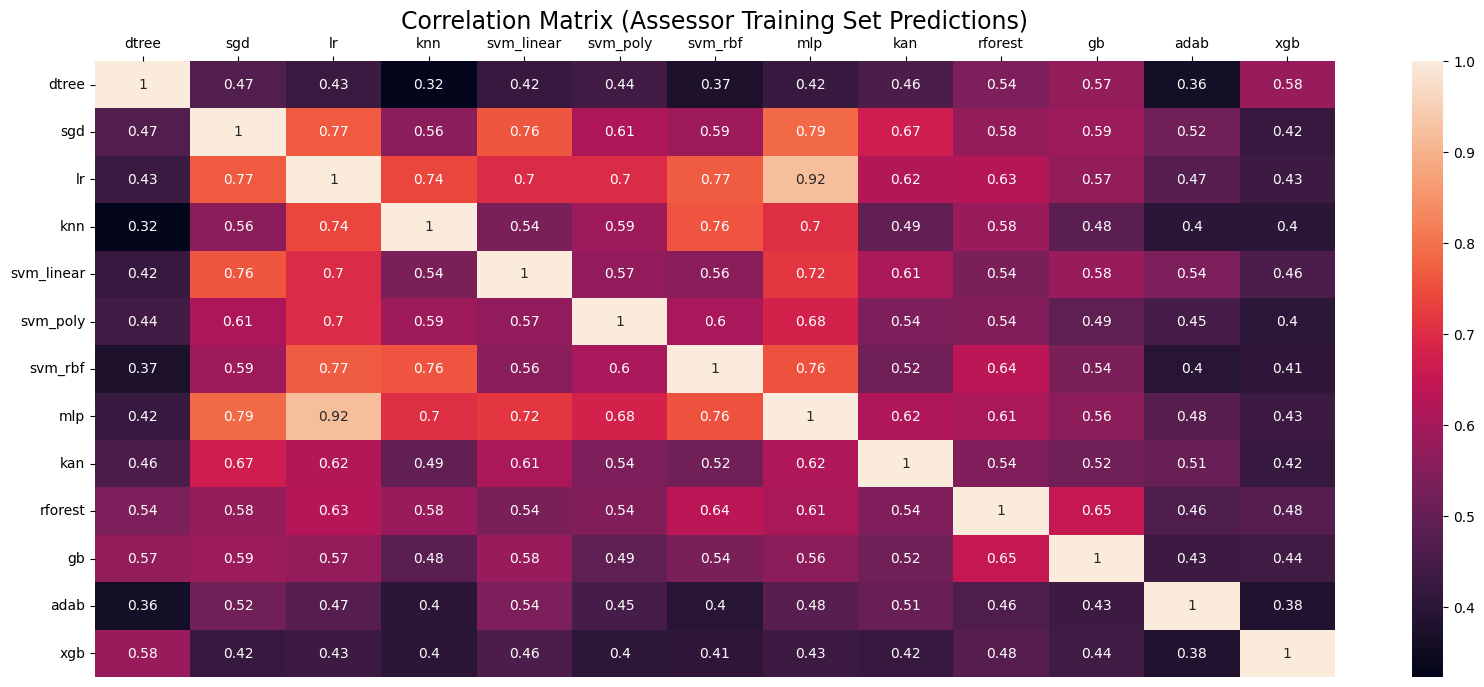

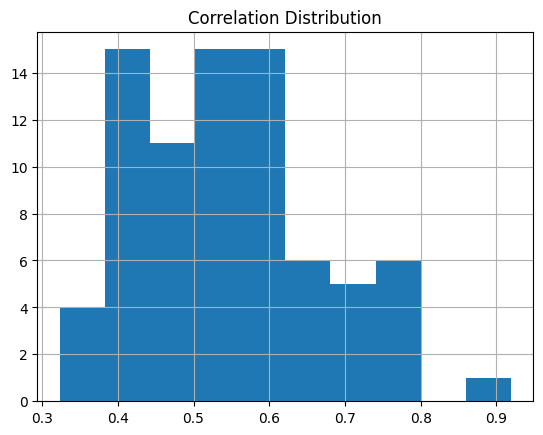

Training correlation distribution:
count    78.000000
mean      0.548970
std       0.120147
min       0.323600
25%       0.452455
50%       0.539873
75%       0.612683
max       0.918925
Name: corr, dtype: float64
[Saved image "cm_atrain.eps"]
[Saved image "cd_atrain.eps"]


In [5]:
correlation_matrix(pred_corrls, True, DIR, 'Assessor', 'Training')

In [6]:
MIN_SCORE = 0.725 #corrls_values['corr'].quantile(0.75)

print('Min_score:', MIN_SCORE)

groups['true_assessor_train'] = group_search(pred_corrls, MIN_SCORE)
groups['true_assessor_train']

Min_score: 0.725


[['adab'],
 ['rforest'],
 ['kan'],
 ['sgd', 'svm_linear'],
 ['dtree'],
 ['svm_poly'],
 ['gb'],
 ['xgb'],
 ['sgd', 'mlp', 'lr'],
 ['knn', 'svm_rbf', 'lr'],
 ['svm_rbf', 'mlp', 'lr']]

Conjunto de Teste:

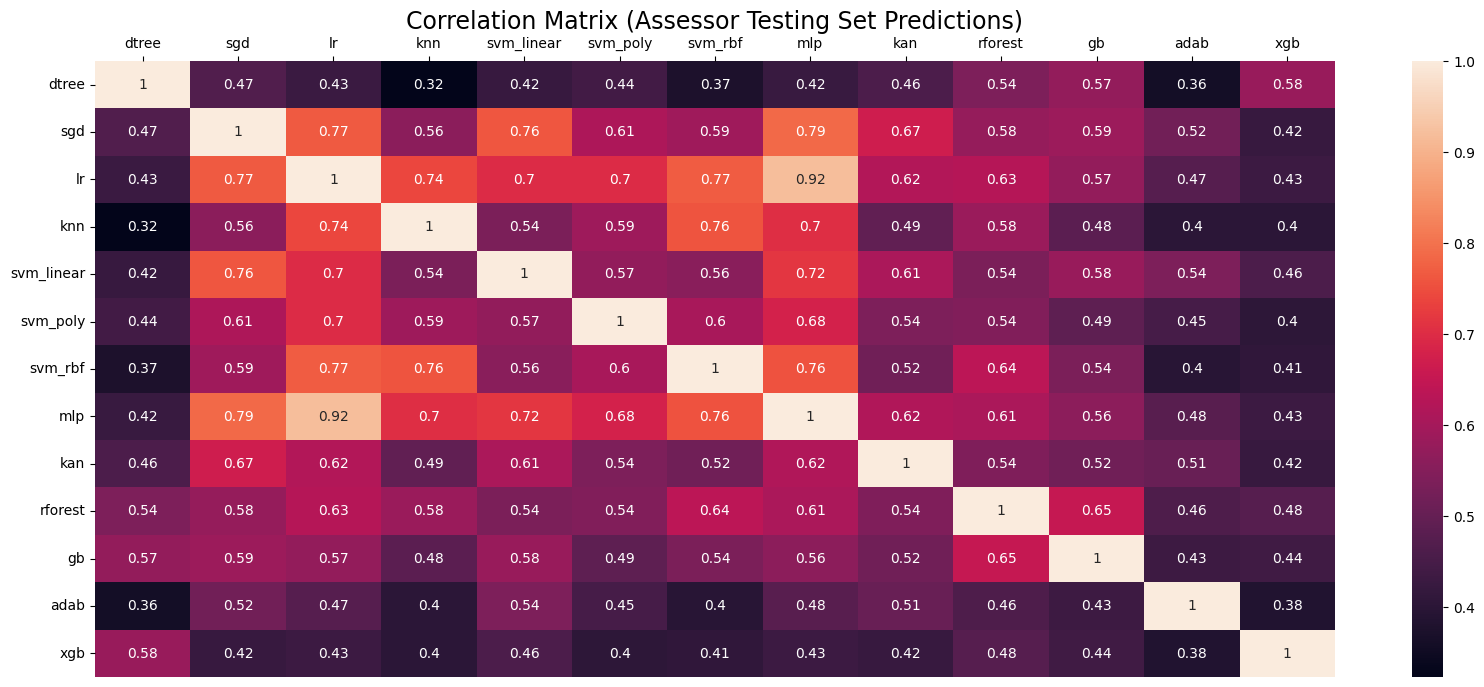

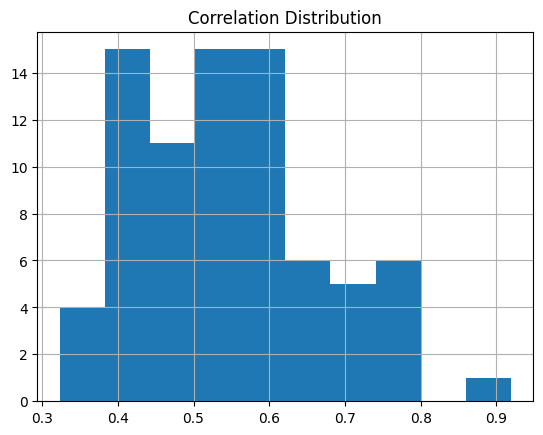

Testing correlation distribution:
count    78.000000
mean      0.548970
std       0.120147
min       0.323600
25%       0.452455
50%       0.539873
75%       0.612683
max       0.918925
Name: corr, dtype: float64
[Saved image "cm_atest.eps"]
[Saved image "cd_atest.eps"]


In [7]:
correlation_matrix(pred_corrls, True, DIR, 'Assessor', 'Testing')

In [8]:
groups['true_assessor_test'] = group_search(pred_corrls2, MIN_SCORE)
groups['true_assessor_test']

[['sgd', 'mlp', 'svm_linear'],
 ['sgd', 'lr', 'mlp', 'svm_poly'],
 ['rforest'],
 ['adab'],
 ['kan'],
 ['knn', 'svm_rbf'],
 ['knn', 'lr'],
 ['dtree'],
 ['gb'],
 ['xgb']]

Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  0.0030
NMSE: 0.1285
MAE:  0.0430
NMAE: 0.4109
aRRMSE: 0.3449
aCC:  0.9535


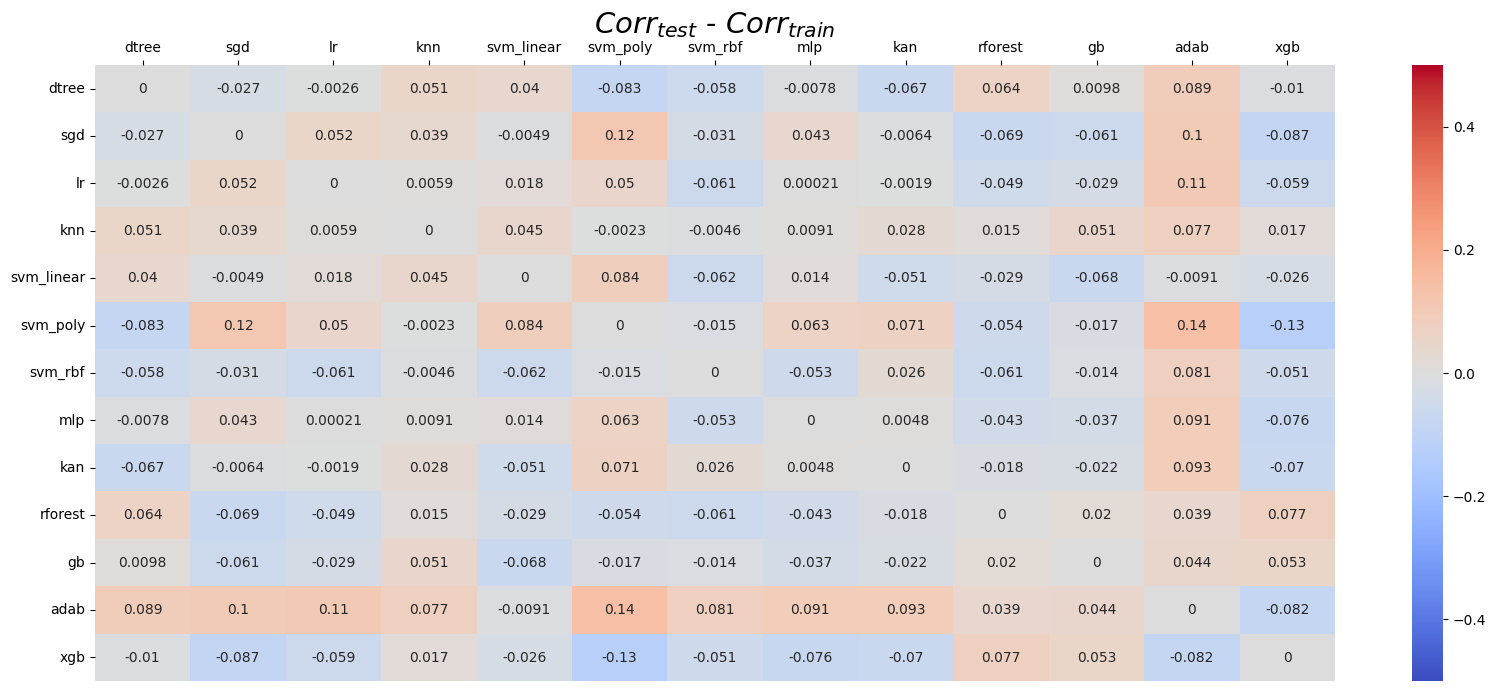

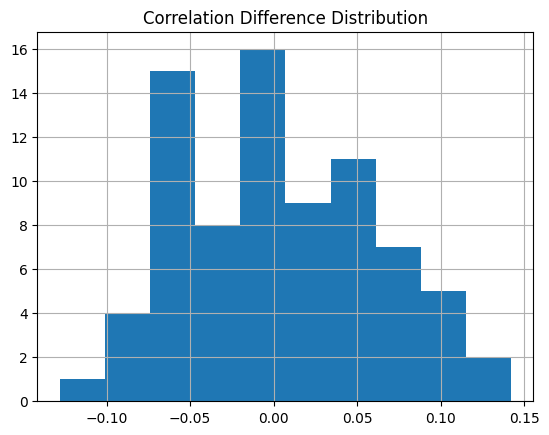

[Saved image "cmd_base.eps"]
[Saved image "cdd_base.eps"]


In [9]:
diff_corrls = pred_corrls2-pred_corrls
diff_corrls_values = corrlArray(diff_corrls)['corr']

print(f'''Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  {mse(pred_corrls, pred_corrls2):.4f}
NMSE: {nmse(pred_corrls, pred_corrls2):.4f}
MAE:  {mae(pred_corrls, pred_corrls2):.4f}
NMAE: {nmae(pred_corrls, pred_corrls2):.4f}
aRRMSE: {rrmse(pred_corrls, pred_corrls2):.4f}
aCC:  {corrCoeff(pred_corrls, pred_corrls2):.4f}''')

plt.figure(figsize=(20,8))
plt.title(r'$Corr_{test}$ - $Corr_{train}$', fontsize=21)
hm = sns.heatmap(diff_corrls, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5)
hm.xaxis.tick_top()
plt.show(hm)

plt.title('Correlation Difference Distribution')
hg = diff_corrls_values.hist()
plt.show(hg)

save2figs(hm, hg, DIR)

## Globais

In [10]:
parameters = {'max_depth':[None,10,20,30],
                    'criterion':['squared_error', 'poisson', 'friedman_mse'],
                    'min_samples_split':[2,5,10,20,40,60],
                    'min_samples_leaf':[1,2,10,30],
                    'n_estimators':[20,50,100,150]}

In [11]:
# Criando o MultiIndex
idx_tups = list(product(['ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)'], model_names))
multi_index = pd.MultiIndex.from_tuples(idx_tups, names=['Assessor', 'Model'])

metrics_df = pd.DataFrame(columns=['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE', 'aCC'], index=multi_index)
diff_metrics = pd.DataFrame(columns=['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE', 'aCC'], index=['ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)'])

### Regressor Chain
(RC)

In [12]:
#study = OptunaStudy(Xa_train, ya_train, 30, seed)
#
#study.search(RegressorChain, cv=5)
#
#rc_params = study.best_params
#regchain = RegressorChain(RandomForestRegressor(random_state=seed).set_params(**rc_params),
#                          random_state=seed, cv=5, verbose=True).fit(Xa_train, ya_train)

In [13]:
regchain = RegressorChain(RandomForestRegressor(random_state=seed), random_state=seed, cv=5,
                          verbose=True).fit(Xa_train, ya_train)

[Chain] .................. (1 of 13) Processing order 0, total=   0.1s
[Chain] .................. (2 of 13) Processing order 1, total=   0.1s
[Chain] .................. (3 of 13) Processing order 2, total=   0.1s
[Chain] .................. (4 of 13) Processing order 3, total=   0.1s
[Chain] .................. (5 of 13) Processing order 4, total=   0.1s
[Chain] .................. (6 of 13) Processing order 5, total=   0.1s
[Chain] .................. (7 of 13) Processing order 6, total=   0.1s
[Chain] .................. (8 of 13) Processing order 7, total=   0.1s
[Chain] .................. (9 of 13) Processing order 8, total=   0.1s
[Chain] ................. (10 of 13) Processing order 9, total=   0.1s
[Chain] ................ (11 of 13) Processing order 10, total=   0.1s
[Chain] ................ (12 of 13) Processing order 11, total=   0.1s
[Chain] ................ (13 of 13) Processing order 12, total=   0.1s


In [14]:
metrics_df.loc['RC',:] = assr_performance(regchain, Xa_test, ya_test, Xa_train, ya_train)

metrics_df.loc['RC',:]

[TRAINING SET]
MSE: 0.0189
NMSE: 0.4035
MAE: 0.0942
NMAE: 0.5747
aRRMSE: 0.6254
aCC: 0.7995

[TESTING SET]
MSE: 0.0573
NMSE: 1.1102
MAE: 0.1620
NMAE: 0.9274
aRRMSE: 1.0527
aCC: 0.1708


MSE       MAE      NMSE      NMAE    aRRMSE       aCC
Model                                                                 
dtree       0.104349  0.951737  0.224283  0.800256   0.97557  0.279237
sgd         0.095705  1.270758  0.237196  1.046466  1.127279  0.074916
lr          0.050671  1.219007  0.164872  0.982104  1.104086  0.126495
knn         0.054779   1.08193  0.175541  0.918699  1.040159  0.168623
svm_linear  0.047886  1.188871  0.159916  0.984828  1.090354  0.175906
svm_poly    0.056789  1.215711  0.170996   0.97814  1.102593  0.197111
svm_rbf     0.021553  1.012128  0.106175  0.877626  1.006046   0.28952
mlp         0.073414  1.145565  0.204877  0.968846  1.070311  0.121001
kan         0.153161  1.039807   0.29819  0.898159  1.019709  0.207218
rforest     0.053391  0.976421  0.160975  0.822432   0.98814  0.298422
gb          0.024846  1.125092  0.110834  0.930217  1.060704  0.041182
adab        0.004694  1.141696  0.051301  0.990831  1.068502  0.077843
xgb         0.003282  1.063468   0.04093  0.857546  1.031246  0.163402

#### Análise das correlações

Melhorar esse cálculo de correlação para fazer melhor uso do 1-(probabilidade da classe correta)

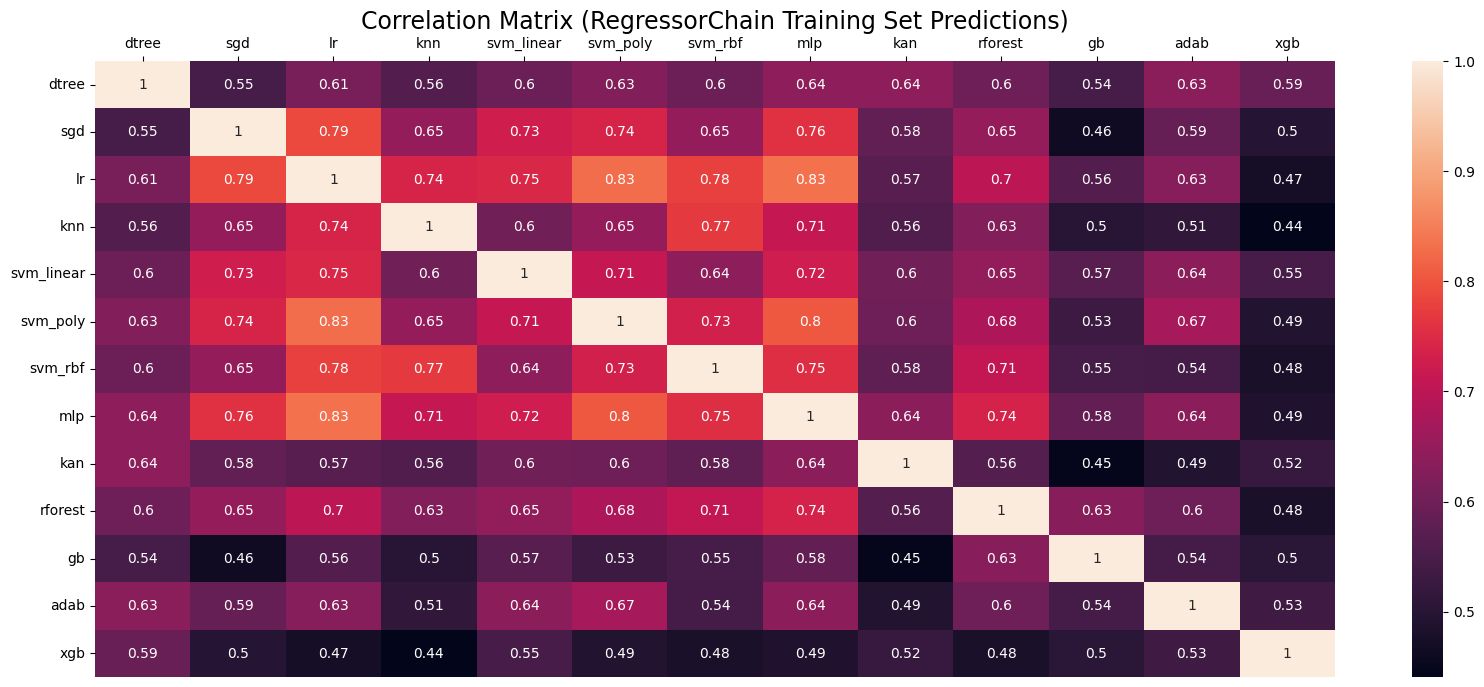

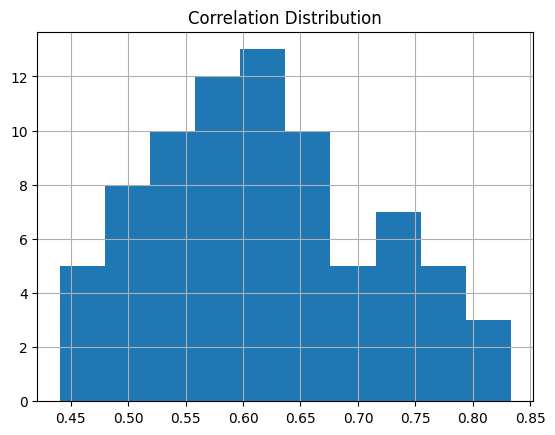

Training correlation distribution:
count    78.000000
mean      0.616739
std       0.096268
min       0.440735
25%       0.545383
50%       0.602150
75%       0.677268
max       0.832923
Name: corr, dtype: float64


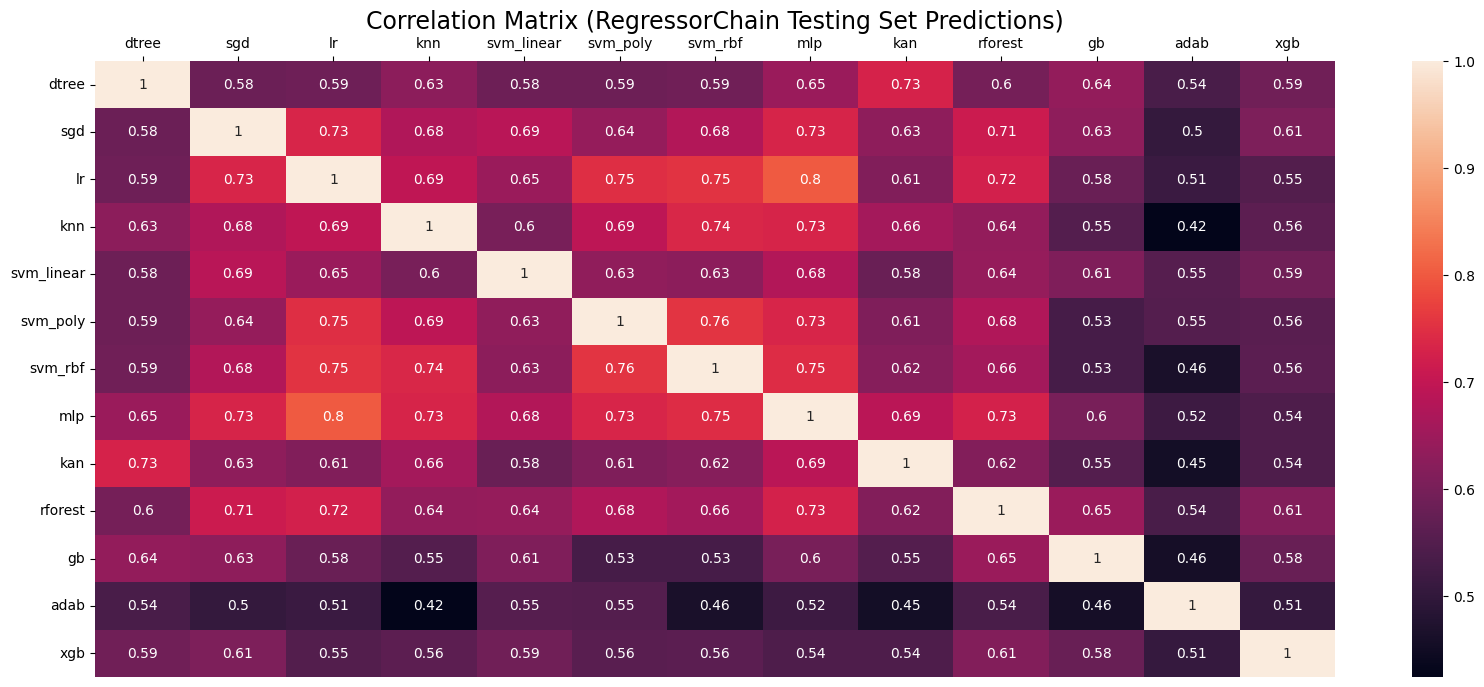

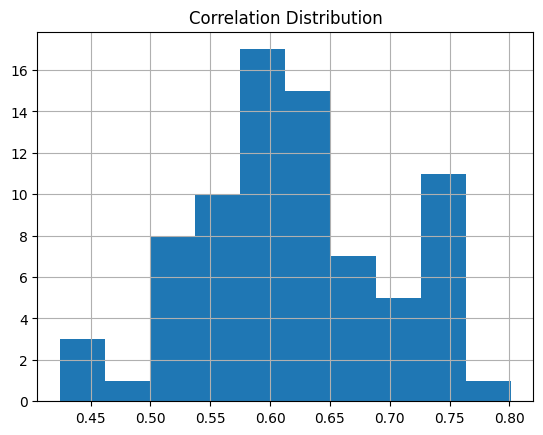

Testing correlation distribution:
count    78.000000
mean      0.618162
std       0.080849
min       0.424448
25%       0.558025
50%       0.613272
75%       0.677264
max       0.801235
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0146
NMSE: 0.0913
MAE: 0.5424
NMAE: 0.7785
aRRMSE: 0.7155
aCC: 0.8271


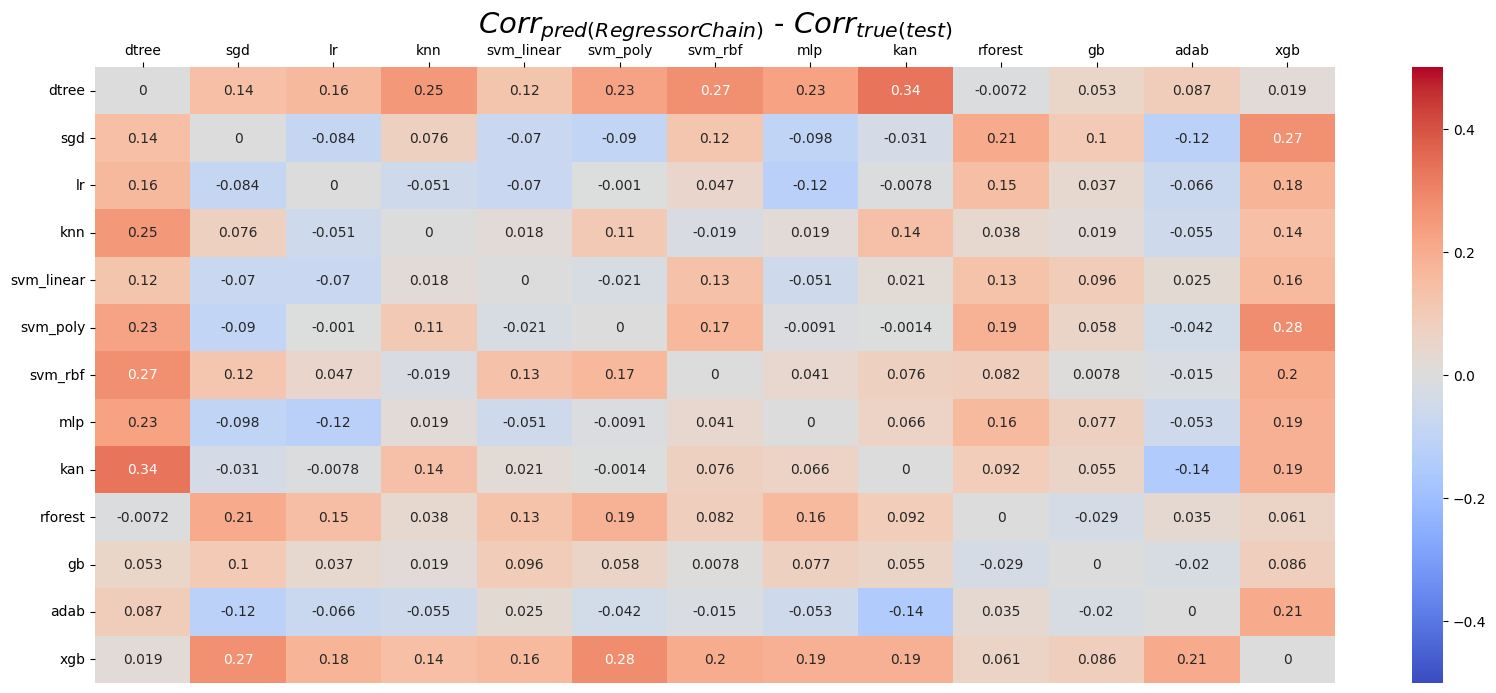

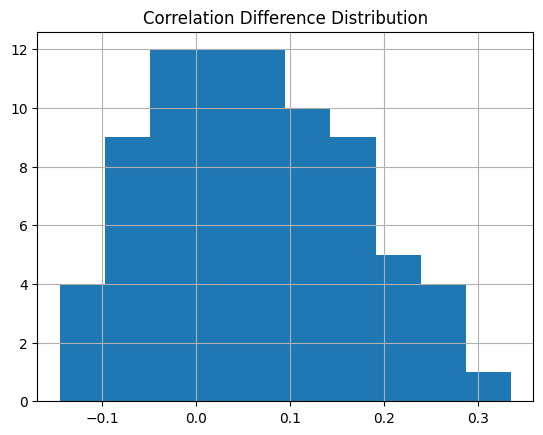

In [15]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 

results = correlation_pred_performance(regchain, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name="RegressorChain",
                                       show_plot=True, save_plot=None)

In [16]:
diff_metrics.loc['RC',:] = results['results']
diff_metrics.loc['RC',:]

MSE       0.014554
MAE       0.091332
NMSE      0.542439
NMAE      0.778509
aRRMSE    0.715497
aCC       0.827071
Name: RC, dtype: object

In [17]:
groups['regchain_assessor'] = results['groups']
groups['regchain_assessor']['test']

[['sgd', 'mlp', 'lr'],
 ['knn', 'svm_rbf', 'mlp'],
 ['lr', 'svm_rbf', 'mlp', 'svm_poly'],
 ['mlp', 'rforest'],
 ['adab'],
 ['kan', 'dtree'],
 ['svm_linear'],
 ['gb'],
 ['xgb']]

### Multi-Output Random Forest Regressor 

In [18]:
mrf = RandomForestRegressor(random_state=seed).fit(Xa_train, ya_train)

In [19]:
metrics_df.loc['MRT',:] = assr_performance(mrf, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0065
NMSE: 0.1247
MAE: 0.0566
NMAE: 0.3300
aRRMSE: 0.3531
aCC: 0.9738

[TESTING SET]
MSE: 0.0552
NMSE: 1.0449
MAE: 0.1685
NMAE: 0.9599
aRRMSE: 1.0214
aCC: 0.1633


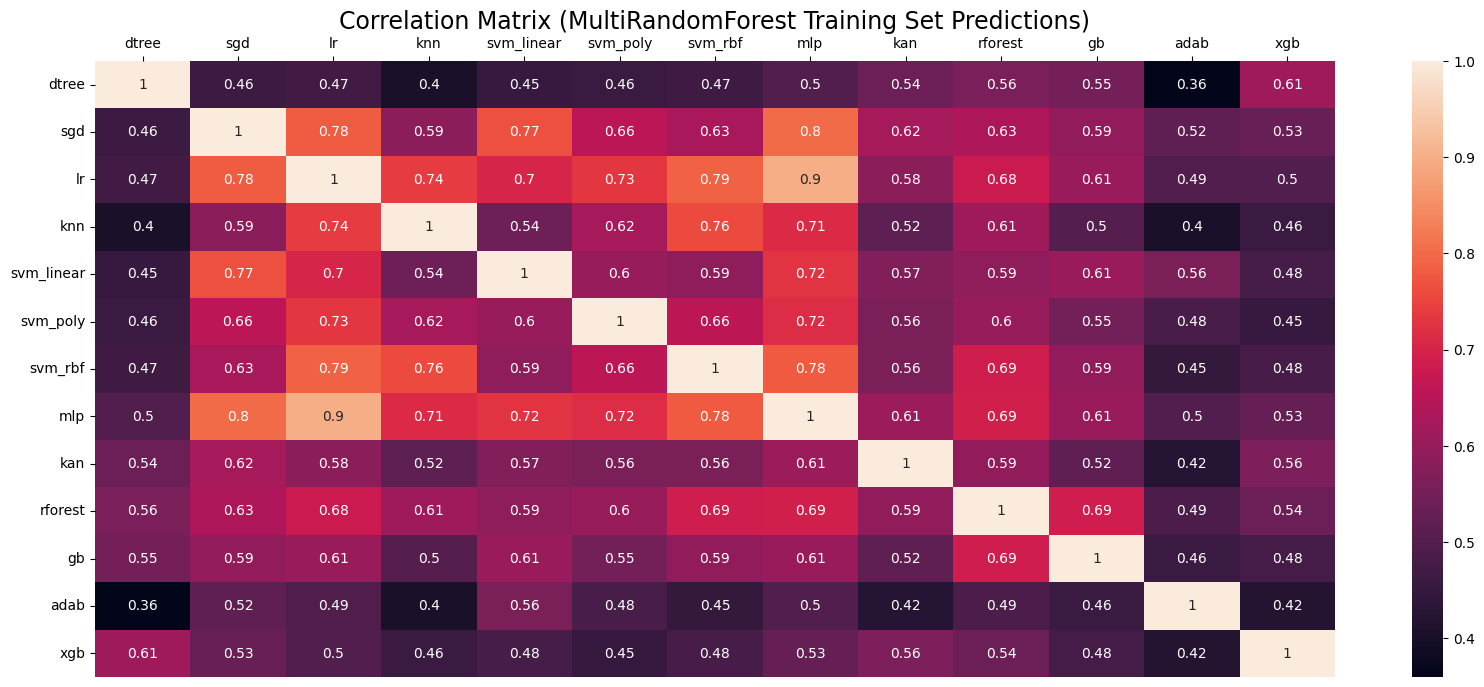

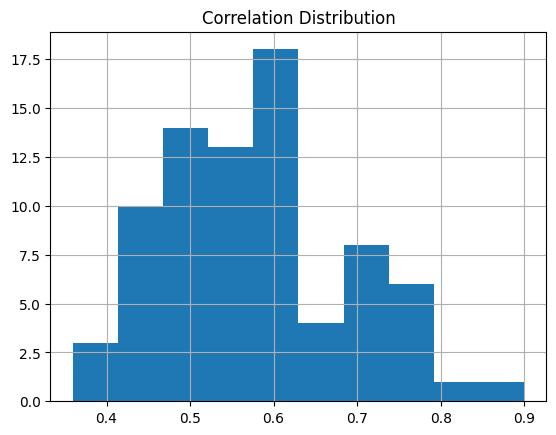

Training correlation distribution:
count    78.000000
mean      0.579582
std       0.110127
min       0.359910
25%       0.493505
50%       0.568197
75%       0.631131
max       0.899664
Name: corr, dtype: float64


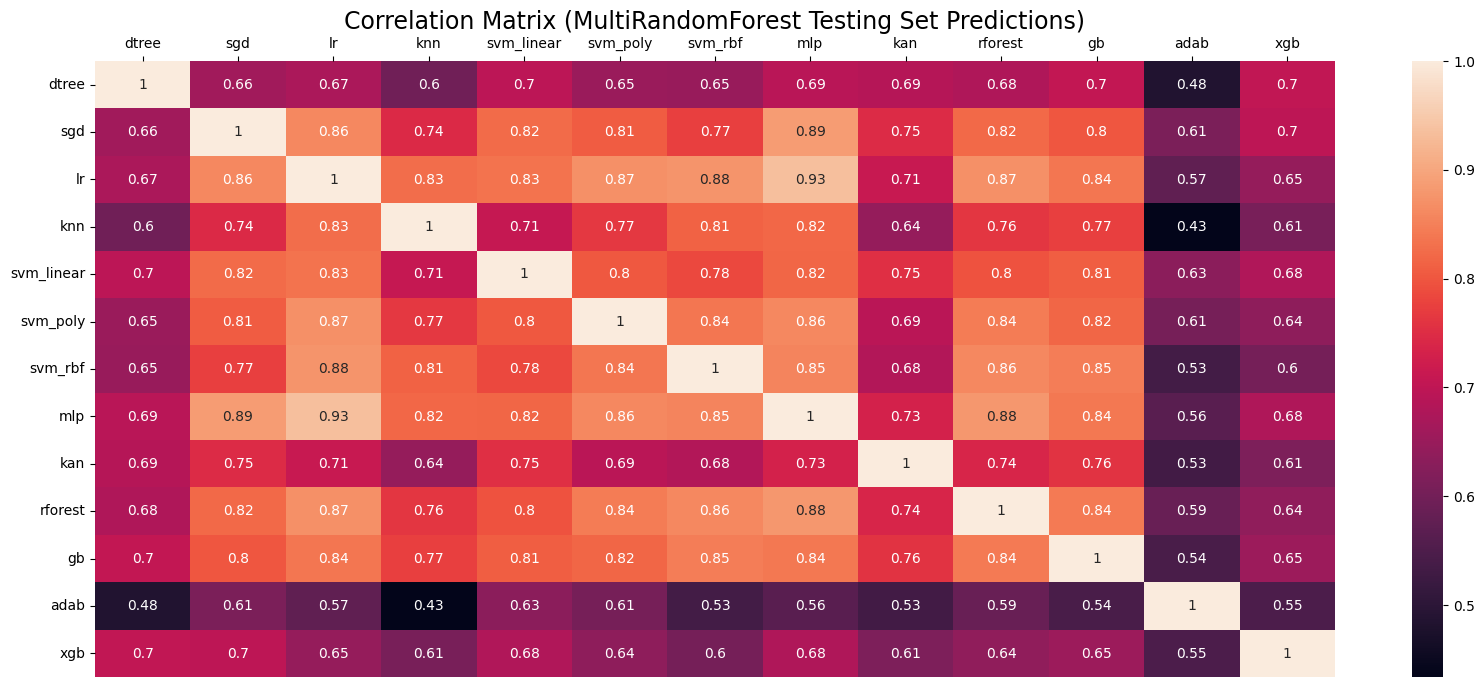

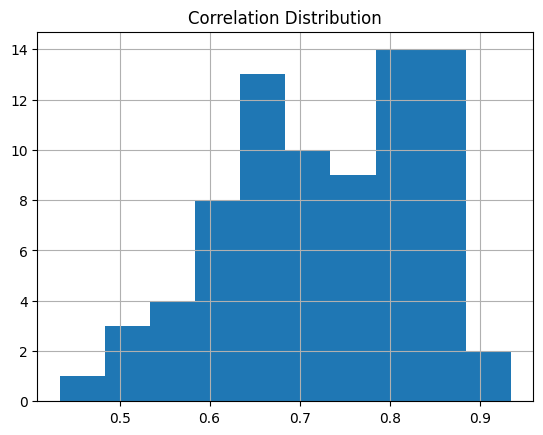

Testing correlation distribution:
count    78.000000
mean      0.726164
std       0.110445
min       0.433709
25%       0.646142
50%       0.733951
75%       0.821405
max       0.934568
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0390
NMSE: 0.1641
MAE: 1.5652
NMAE: 1.4414
aRRMSE: 1.2090
aCC: 0.7753


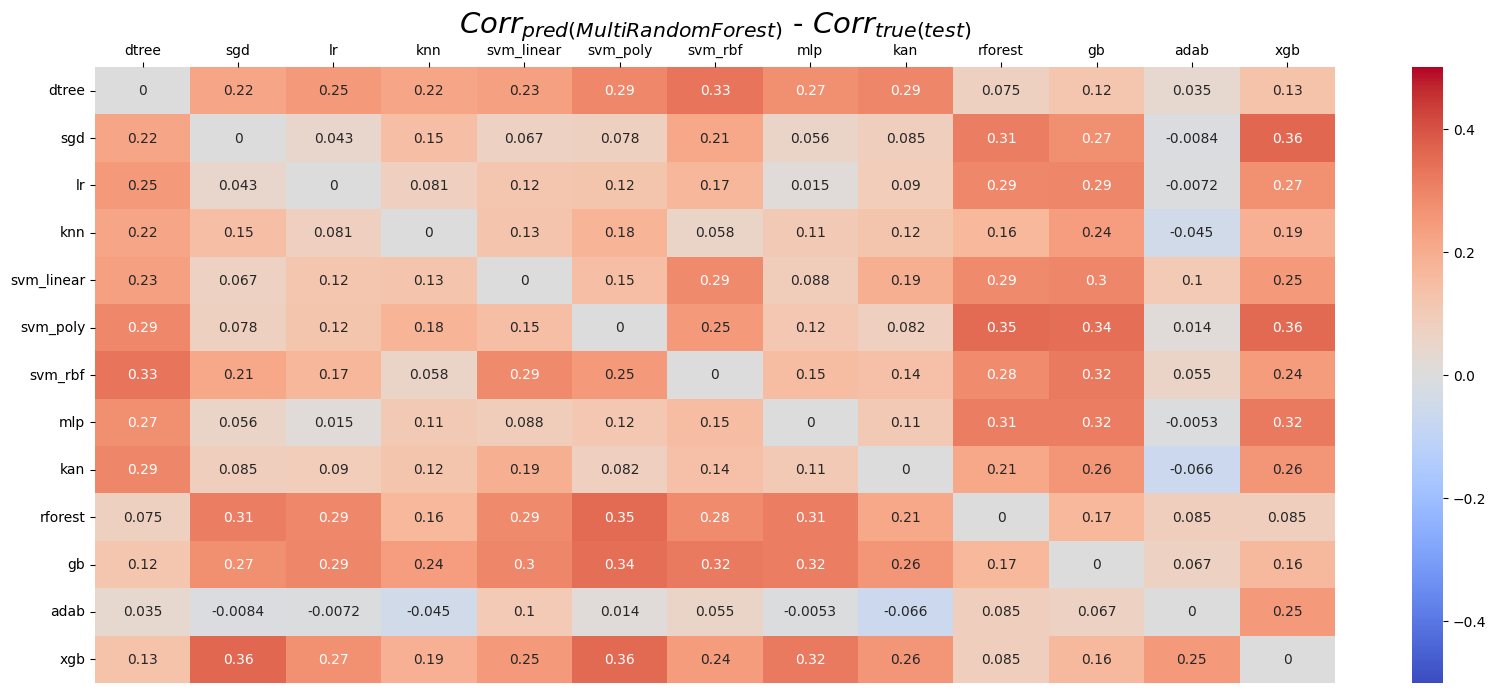

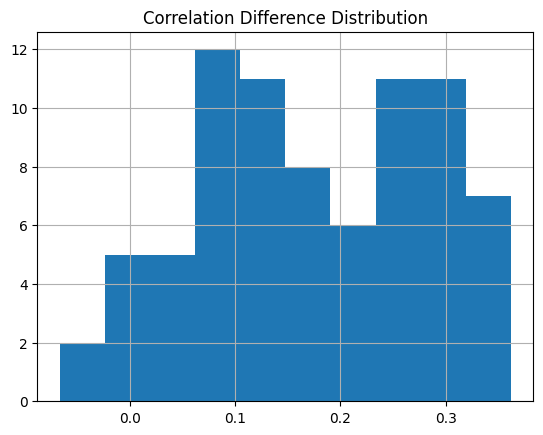

In [20]:
results = correlation_pred_performance(mrf, Xa_test, ya_test, Xa_train, 
                                       MIN_SCORE, name="MultiRandomForest")

In [21]:
diff_metrics.loc['MRT',:] = results['results']
diff_metrics.loc['MRT',:]

MSE       0.038984
MAE       0.164065
NMSE      1.565188
NMAE      1.441396
aRRMSE    1.209004
aCC       0.775307
Name: MRT, dtype: object

In [22]:
groups['mrf_assessor'] = results['groups']
groups['mrf_assessor']['test']

[['dtree'],
 ['xgb'],
 ['mlp', 'rforest', 'sgd', 'knn', 'svm_rbf', 'svm_poly', 'gb', 'lr'],
 ['mlp', 'rforest', 'sgd', 'kan', 'svm_linear', 'gb'],
 ['mlp', 'rforest', 'sgd', 'svm_linear', 'svm_rbf', 'svm_poly', 'gb', 'lr'],
 ['adab']]

### Multi-Output SVR

In [23]:
#msvr = MSVR()
#msvr.fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#msvr_params = product(svm_rbf_params)
#g_search = GridSearchCV(MSVR(), svm_rbf_params, scoring='neg_mean_squared_error', n_jobs=-1).fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#print(g_search.best_params_)
#msvr = g_search.best_estimator_

In [24]:
#study_norm = OptunaStudy(Xa_train_norm, ya_train.values, 200)
#study_norm.search(MSVR)

In [25]:
msvr = MSVR().fit(Xa_train_norm, ya_train.values)

In [26]:
metrics_df.loc['M-SVR',:] = assr_performance(msvr, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

[TRAINING SET]
MSE: 0.0153
NMSE: 0.4433
MAE: 0.0920
NMAE: 0.6101
aRRMSE: 0.6315
aCC: 0.8343

[TESTING SET]
MSE: 0.0479
NMSE: 1.2736
MAE: 0.1565
NMAE: 0.9826
aRRMSE: 1.0767
aCC: 0.3397


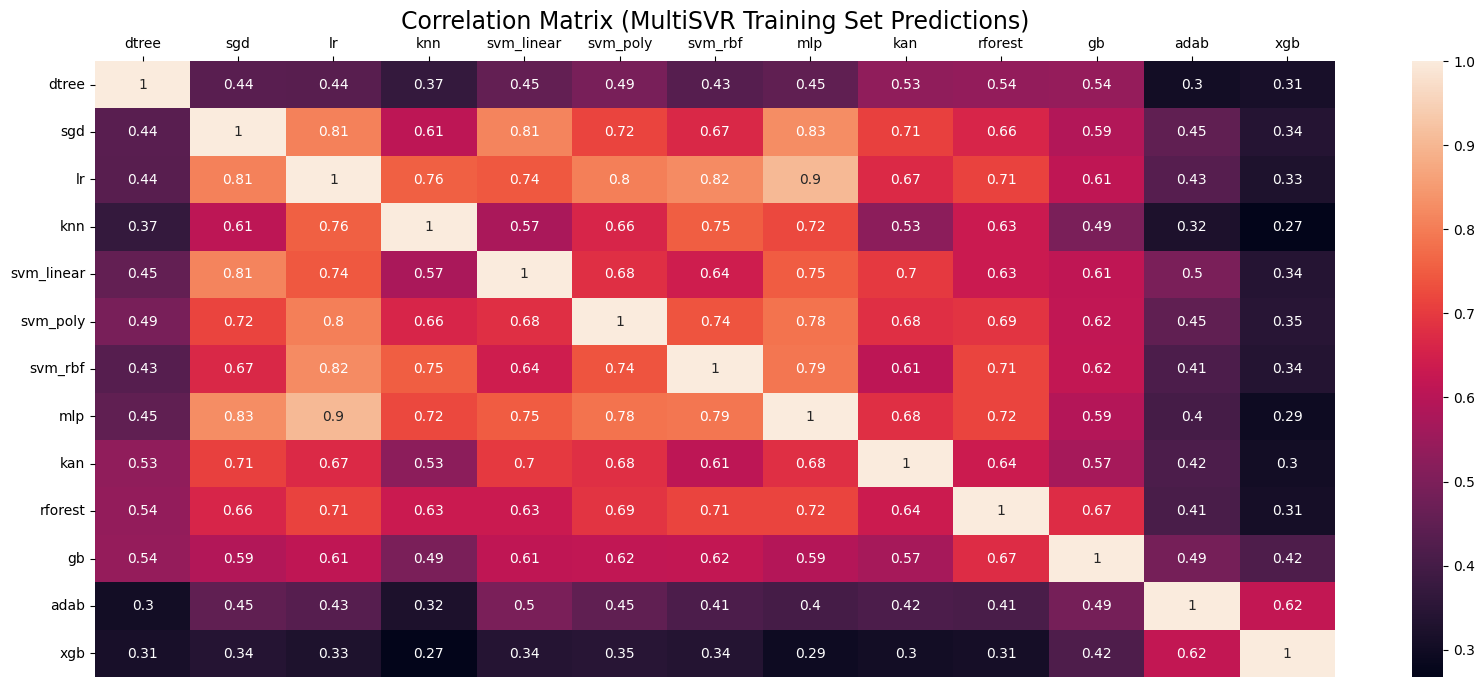

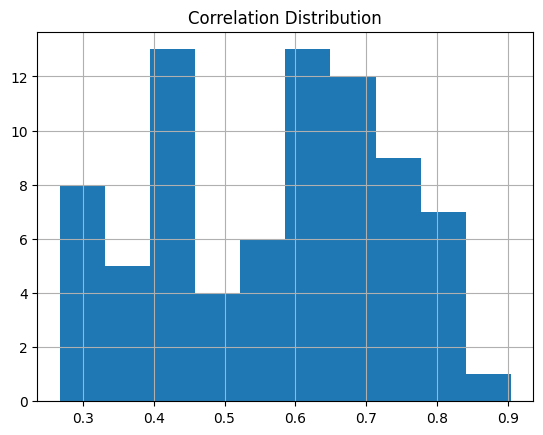

Training correlation distribution:
count    78.000000
mean      0.569070
std       0.162541
min       0.267637
25%       0.432475
50%       0.610526
75%       0.695073
max       0.904143
Name: corr, dtype: float64


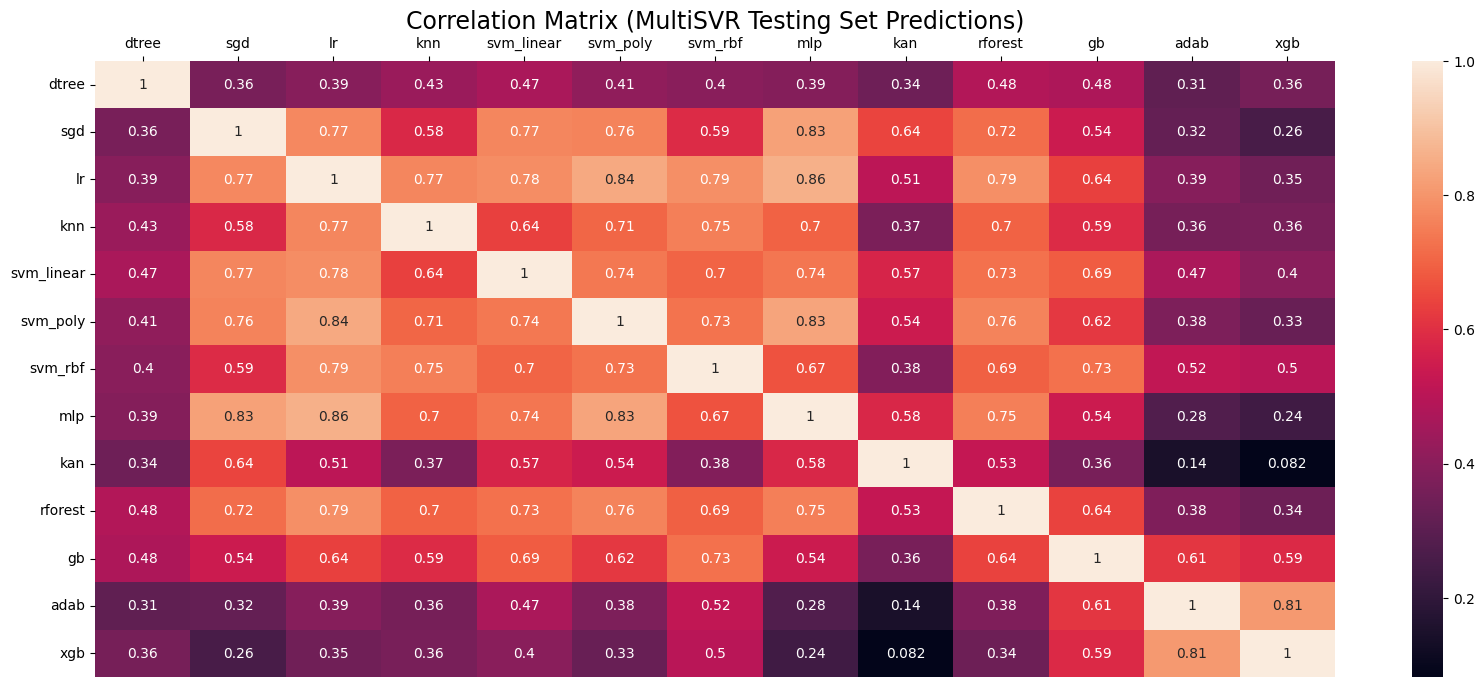

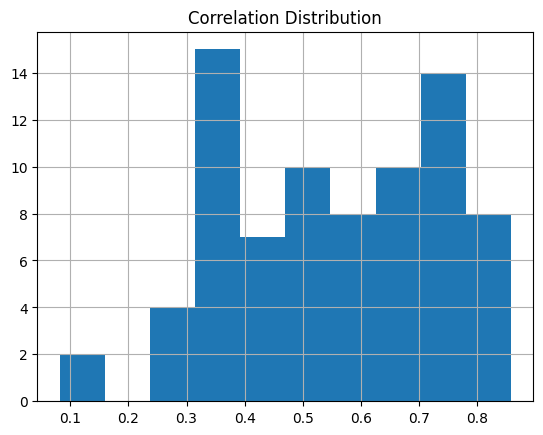

Testing correlation distribution:
count    78.000000
mean      0.552279
std       0.186543
min       0.082099
25%       0.384259
50%       0.575926
75%       0.723765
max       0.858025
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0195
NMSE: 0.1000
MAE: 0.7967
NMAE: 0.9043
aRRMSE: 0.8315
aCC: 0.7639


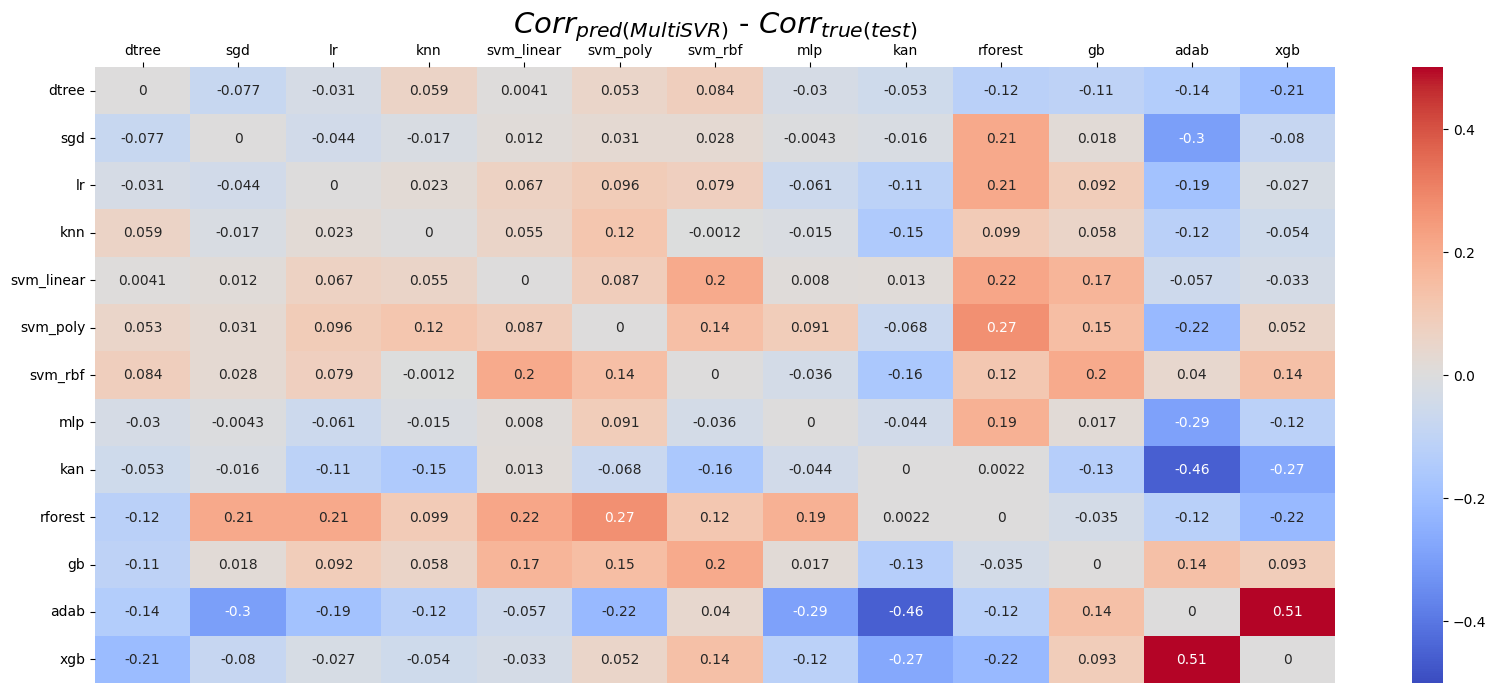

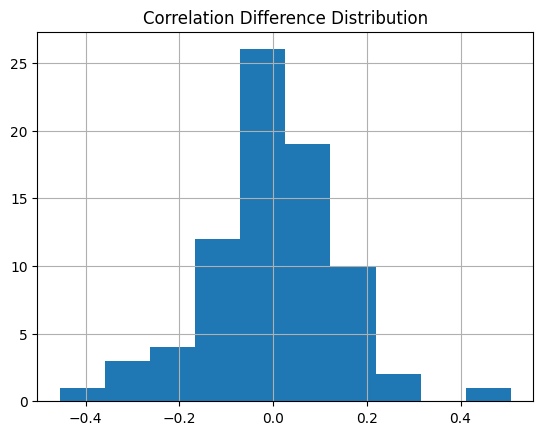

In [27]:
results = correlation_pred_performance(msvr, 
                                       pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test,
                                       pd.DataFrame(Xa_train_norm, index=Xa_train.index), 
                                       MIN_SCORE, name="MultiSVR")

In [28]:
diff_metrics.loc['M-SVR',:] = results['results']
diff_metrics.loc['M-SVR',:]

MSE       0.019476
MAE        0.10004
NMSE      0.796705
NMAE      0.904293
aRRMSE    0.831468
aCC       0.763911
Name: M-SVR, dtype: object

In [29]:
groups['msvr_assessor'] = results['groups']
groups['msvr_assessor']['test']

[['xgb', 'adab'],
 ['kan'],
 ['dtree'],
 ['gb', 'svm_rbf'],
 ['knn', 'svm_rbf', 'lr'],
 ['lr', 'svm_rbf', 'svm_poly'],
 ['mlp', 'sgd', 'svm_linear', 'svm_poly', 'lr'],
 ['mlp', 'rforest', 'svm_linear', 'svm_poly', 'lr']]

### Multi-Output Regressor 
(ST)

In [30]:
#mtr_params = getAssrParams(RandomForestRegressor, parameters, seed, False, 'estimator')
#
##mor = MultiOutputRegressor(RandomForestRegressor(random_state=seed), n_jobs=-1).fit(Xa_train, ya_train)
#g_search = GridSearchCV(MultiOutputRegressor(RandomForestRegressor()), mtr_params, n_jobs=-1, verbose=True, scoring="neg_mean_absolute_error").fit(Xa_train, ya_train)
#print(g_search.best_params_)
#mor = g_search.best_estimator_

In [31]:
#study = OptunaStudy(Xa_train, ya_train, 100)
#study.search(MultiOutputRegressor)

In [32]:
single_tgt = MultiOutputRegressor(RandomForestRegressor(random_state=seed), 
                                  n_jobs=-1).fit(Xa_train, ya_train)

In [33]:
metrics_df.loc['ST',:] = assr_performance(single_tgt, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0061
NMSE: 0.1167
MAE: 0.0543
NMAE: 0.3157
aRRMSE: 0.3414
aCC: 0.9723

[TESTING SET]
MSE: 0.0556
NMSE: 1.0450
MAE: 0.1656
NMAE: 0.9398
aRRMSE: 1.0209
aCC: 0.1899


#### Análise das correlações

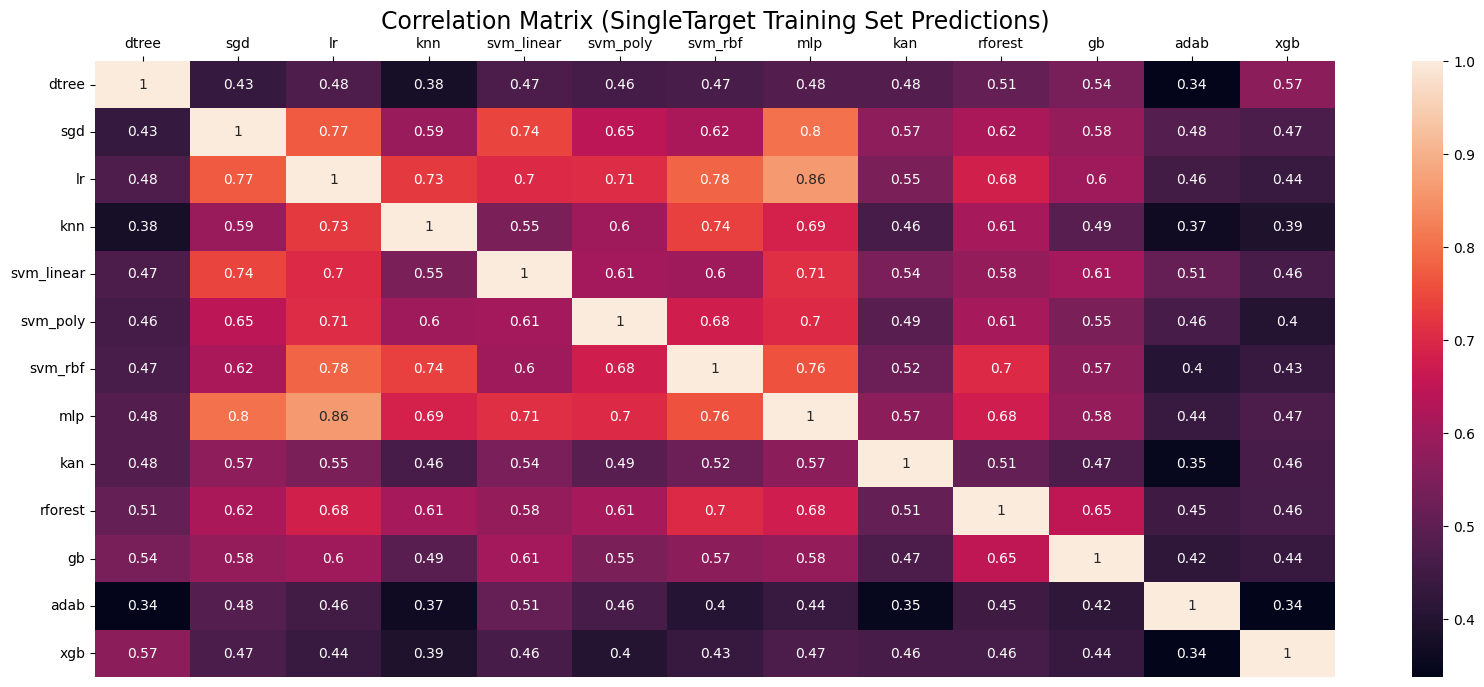

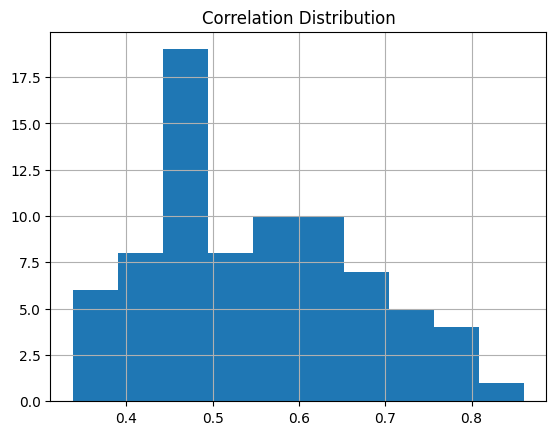

Training correlation distribution:
count    78.000000
mean      0.552696
std       0.120983
min       0.338224
25%       0.463563
50%       0.544599
75%       0.619373
max       0.860694
Name: corr, dtype: float64


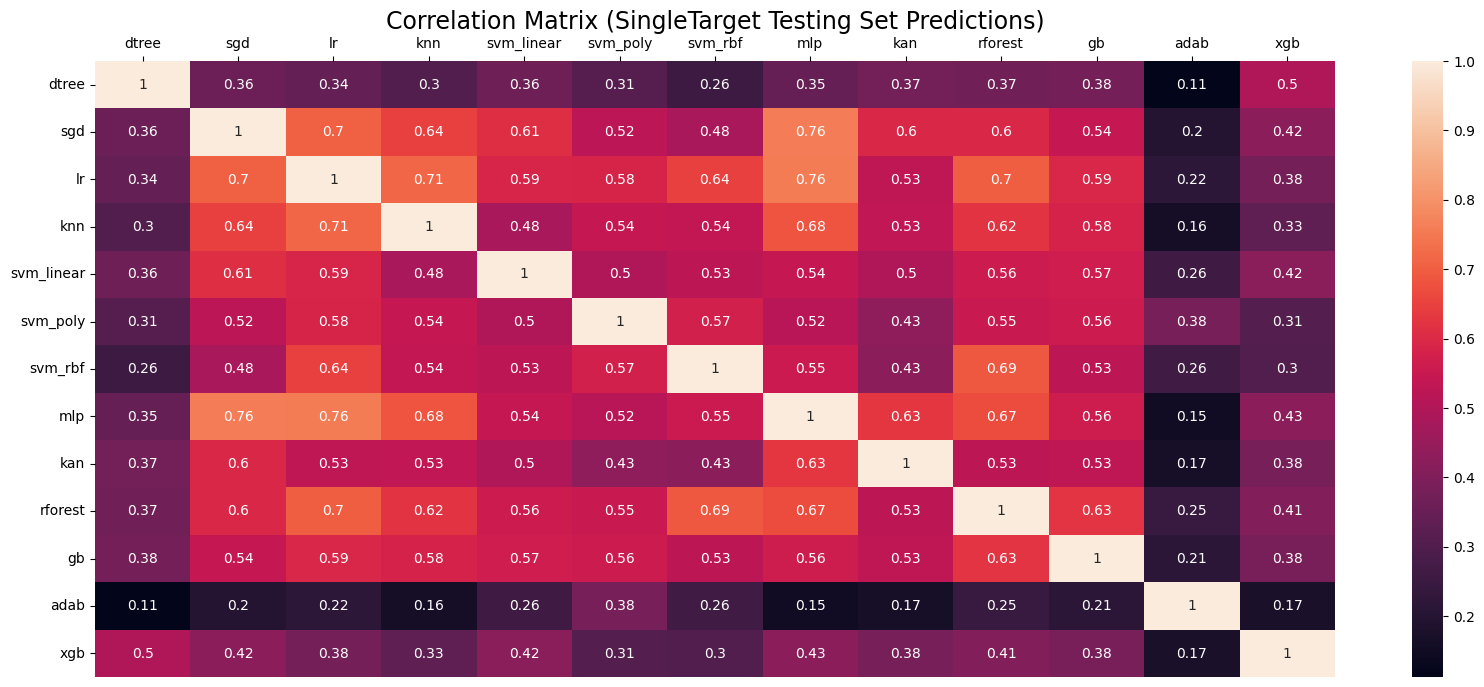

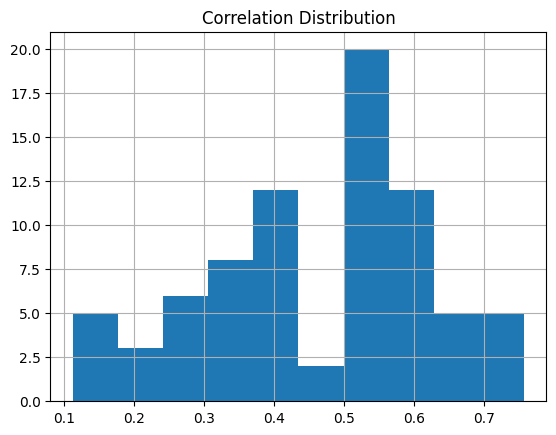

Testing correlation distribution:
count    78.000000
mean      0.465515
std       0.159264
min       0.112346
25%       0.357870
50%       0.508951
75%       0.580855
max       0.757407
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0224
NMSE: 0.1082
MAE: 0.8947
NMAE: 0.9479
aRRMSE: 0.8811
aCC: 0.8155


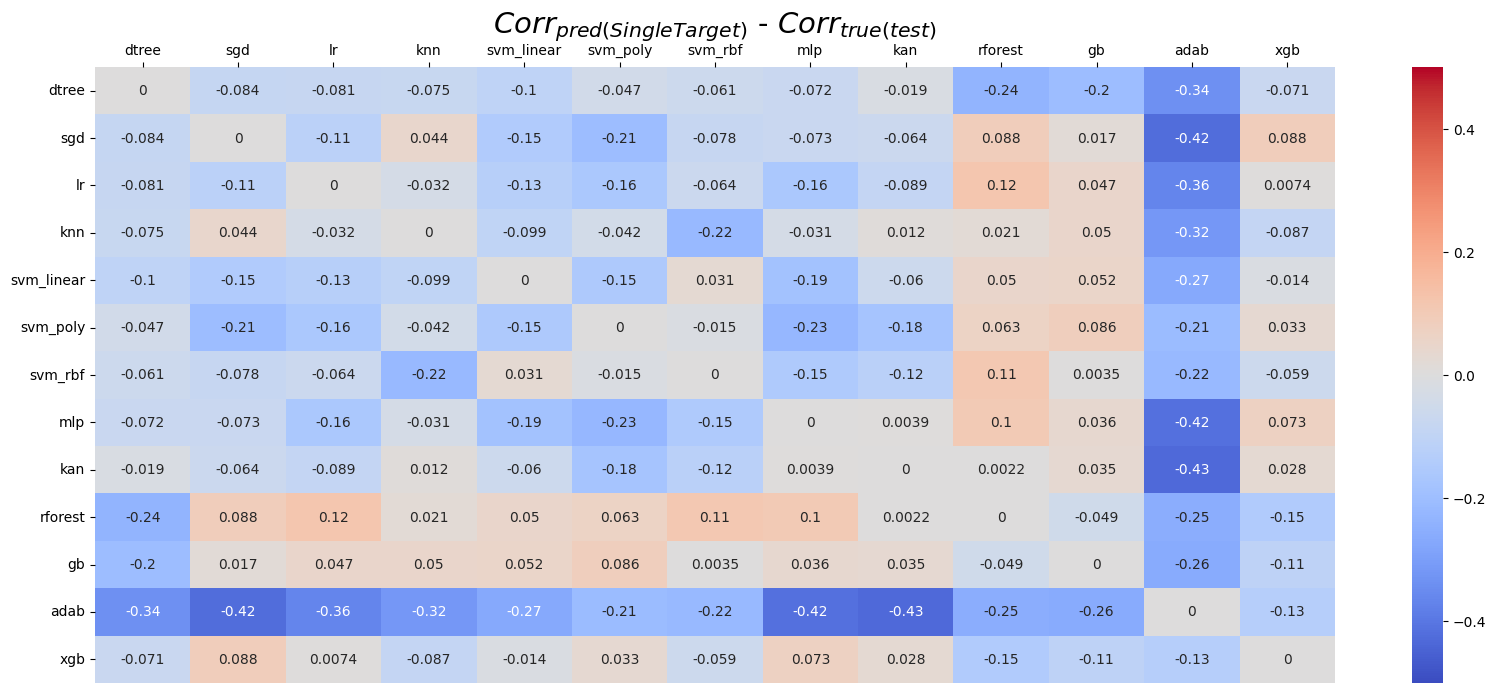

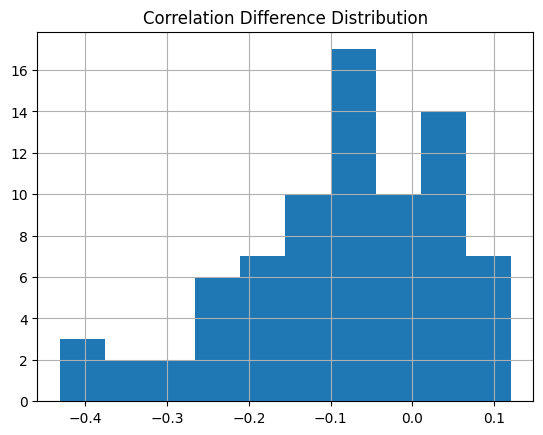

In [34]:
results = correlation_pred_performance(single_tgt, Xa_test, ya_test, Xa_train,
                                       MIN_SCORE, name="SingleTarget")

In [35]:
diff_metrics.loc['ST',:] = results['results']
diff_metrics.loc['ST',:]

MSE        0.02238
MAE       0.108213
NMSE      0.894734
NMAE      0.947869
aRRMSE    0.881068
aCC       0.815453
Name: ST, dtype: object

In [36]:
groups['st_assessor'] = results['groups']
groups['st_assessor']['test']

[['sgd', 'mlp'],
 ['mlp', 'lr'],
 ['rforest'],
 ['adab'],
 ['kan'],
 ['svm_linear'],
 ['knn'],
 ['svm_rbf'],
 ['dtree'],
 ['svm_poly'],
 ['gb'],
 ['xgb']]

## Grupais

In [37]:
#keys = list(groups.keys())
#for i in range(len(keys)):
#    for j in range(i+1, len(keys)):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & {keys[j]}({len(groups[keys[j]])}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups[keys[j]]):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

In [38]:
for g in groups['true_assessor_train']:
    if(len(g)!=1):
        teste = []
        for i, m in enumerate(g):
            for n in g[i+1:]:
                teste.append(pred_corrls.loc[m,n])
        print(g)
        print(f'total: {np.mean(teste)}\n')

['sgd', 'svm_linear']
total: 0.7617021276595745

['sgd', 'mlp', 'lr']
total: 0.8241134751773048

['knn', 'svm_rbf', 'lr']
total: 0.7555647979859691

['svm_rbf', 'mlp', 'lr']
total: 0.8145576707726763



### Regressor Chain

In [39]:
rcg = GroupedAssessor(RegressorChain, model_names, random_state=seed)
rcg.fit(Xa_train, ya_train, groups['true_assessor_train'], base_estimator=RandomForestRegressor(random_state=seed), random_state=seed)

[TRAINING SET]
MSE: 0.0069
NMSE: 0.1327
MAE: 0.0568
NMAE: 0.3296
aRRMSE: 0.3614
aCC: 0.9652

[TESTING SET]
MSE: 0.0565
NMSE: 1.0676
MAE: 0.1669
NMAE: 0.9488
aRRMSE: 1.0313
aCC: 0.1680


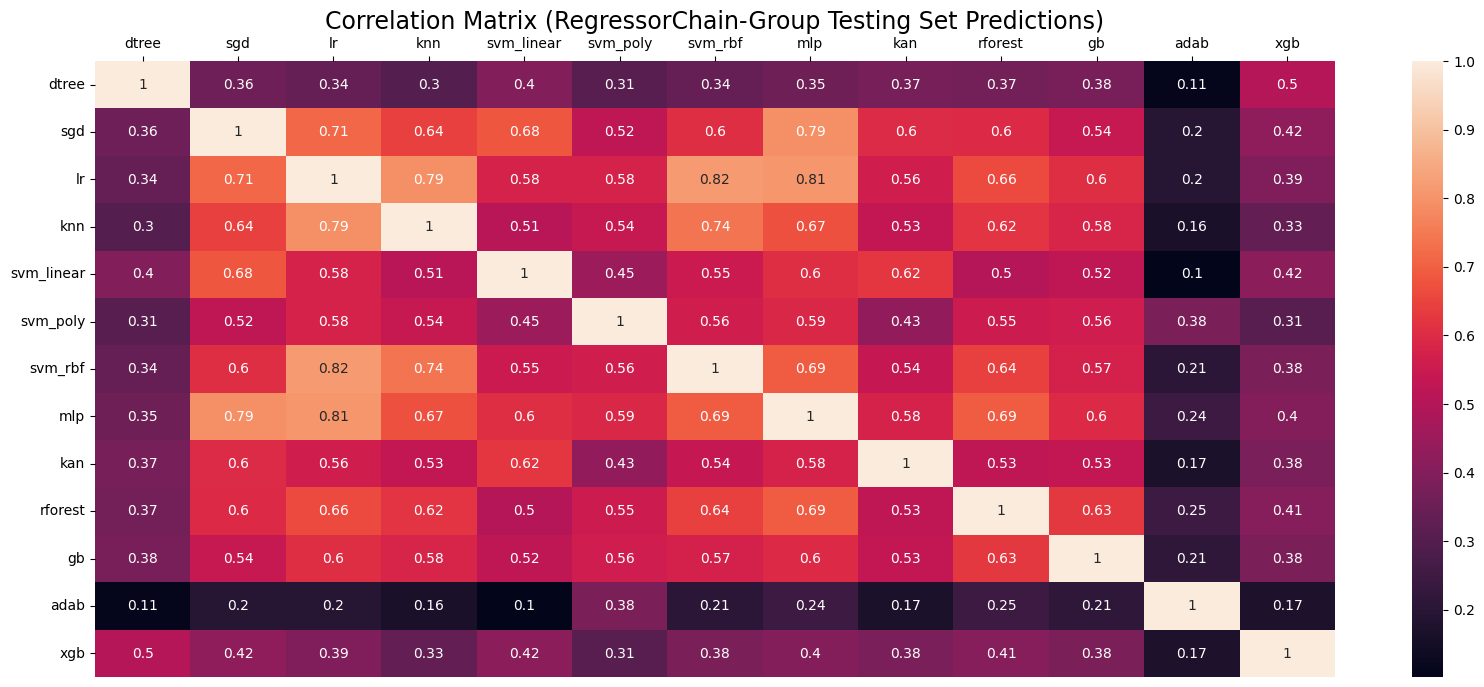

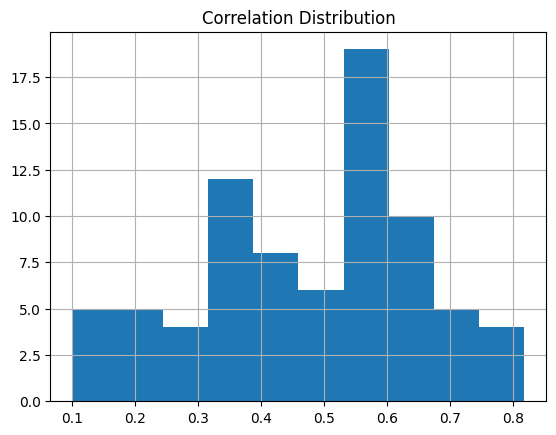

Testing correlation distribution:
count    78.000000
mean      0.480592
std       0.173987
min       0.101852
25%       0.369136
50%       0.525000
75%       0.596605
max       0.817284
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0215
NMSE: 0.1003
MAE: 0.8713
NMAE: 0.8870
aRRMSE: 0.8527
aCC: 0.8201


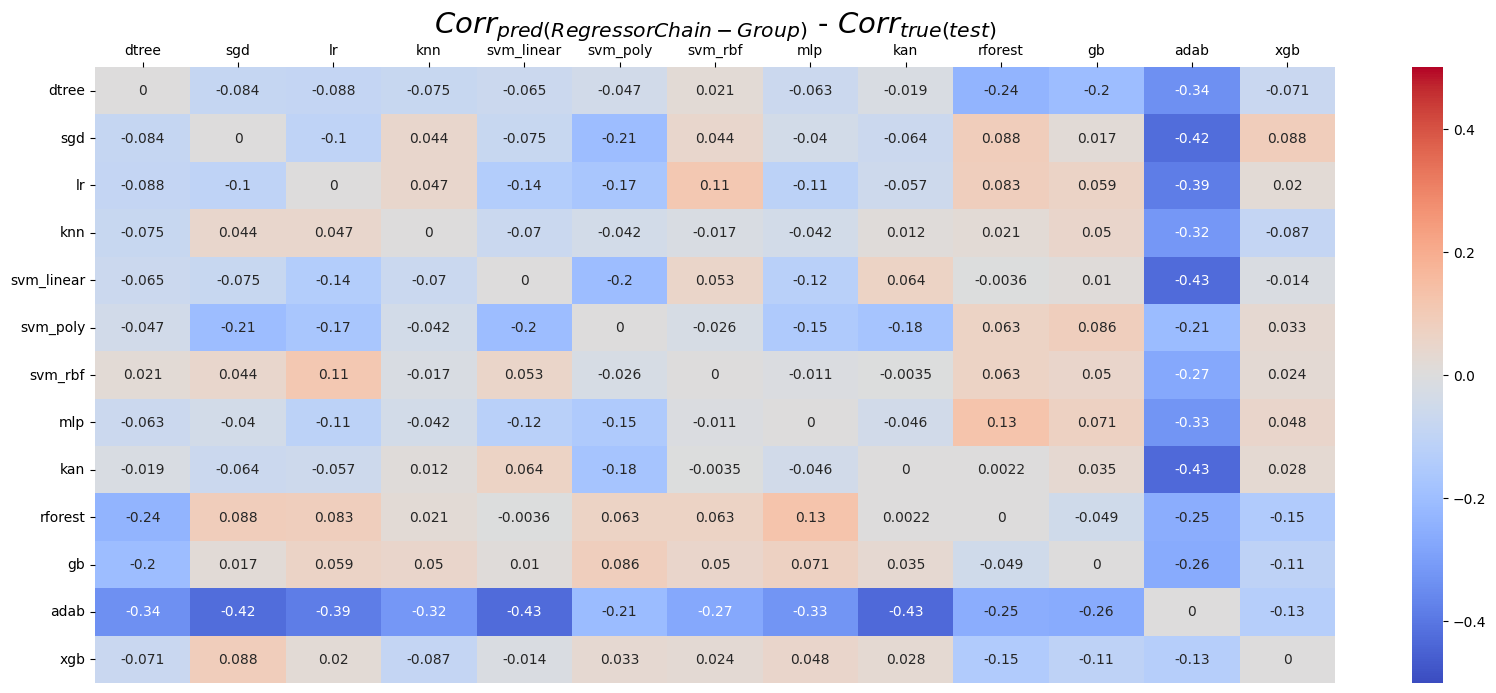

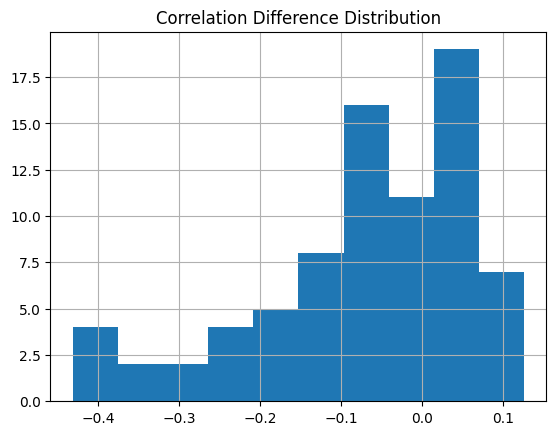

[['adab'], ['rforest'], ['sgd', 'mlp'], ['kan'], ['svm_linear'], ['dtree'], ['svm_poly'], ['gb'], ['xgb'], ['knn', 'svm_rbf', 'lr'], ['mlp', 'lr']]


In [40]:
metrics_df.loc['RC(g)',:] = assr_performance(rcg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(rcg, Xa_test, ya_test, min_score=MIN_SCORE, name="RegressorChain-Group")

diff_metrics.loc['RC(g)',:] = results['results']

groups['rcg_assessor'] = results['groups']
print(groups['rcg_assessor']['test'])

In [41]:
results

{'results': [0.021466230429648,
  0.10034956129342791,
  0.8712555091194077,
  0.8869901140333757,
  0.8526711097545288,
  0.8200864360657859],
 'groups': {'test': [['adab'],
   ['rforest'],
   ['sgd', 'mlp'],
   ['kan'],
   ['svm_linear'],
   ['dtree'],
   ['svm_poly'],
   ['gb'],
   ['xgb'],
   ['knn', 'svm_rbf', 'lr'],
   ['mlp', 'lr']]}}

### Multi-Output SVR

In [42]:
msvrg = GroupedAssessor(MSVR, model_names, seed)

msvrg.fit(Xa_train_norm, ya_train, groups['true_assessor_train'])

c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u
c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u


[TRAINING SET]
MSE: 0.0244
NMSE: 0.5570
MAE: 0.1139
NMAE: 0.7091
aRRMSE: 0.7297
aCC: 0.7728

[TESTING SET]
MSE: 0.0530
NMSE: 1.3262
MAE: 0.1608
NMAE: 1.0029
aRRMSE: 1.1078
aCC: 0.3063


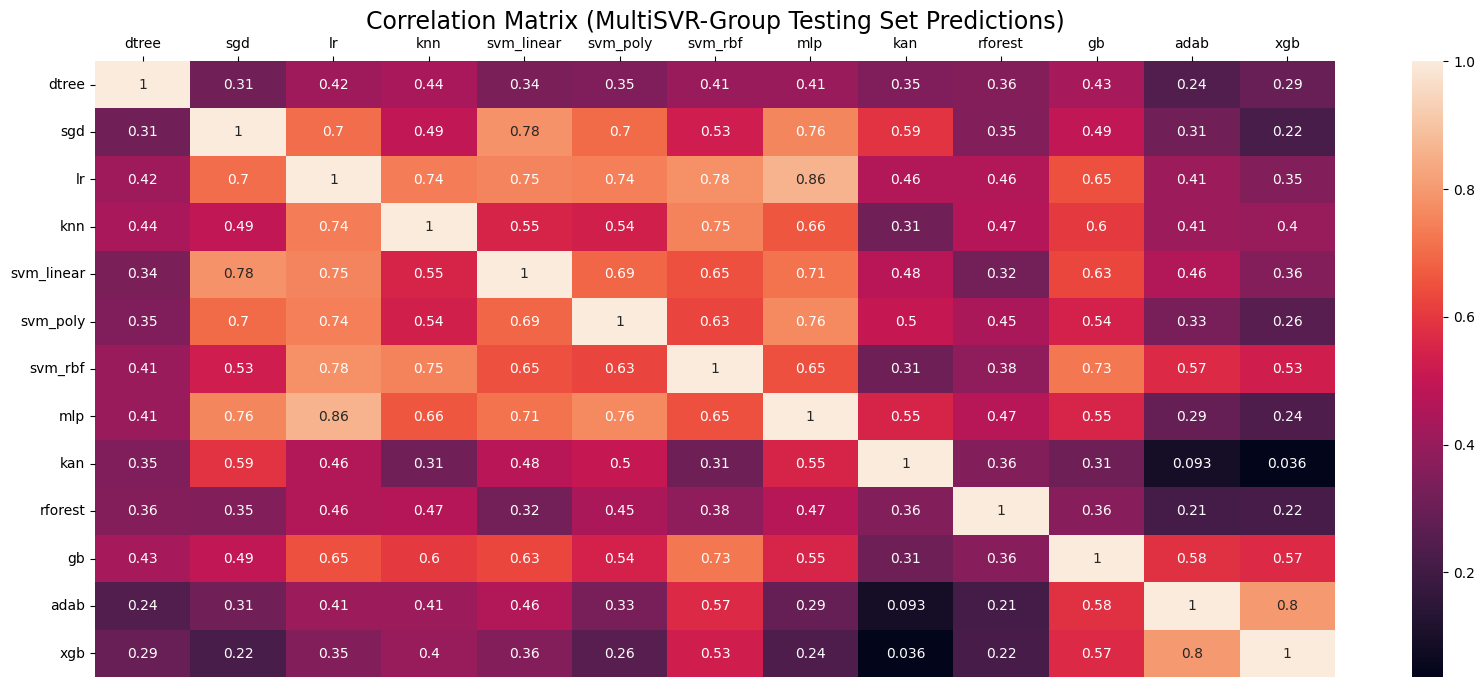

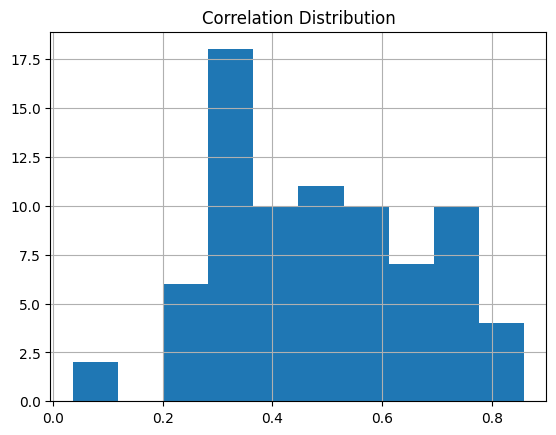

Testing correlation distribution:
count    78.000000
mean      0.484077
std       0.181417
min       0.036420
25%       0.350000
50%       0.465123
75%       0.629475
max       0.858642
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0238
NMSE: 0.1114
MAE: 1.0027
NMAE: 1.0256
aRRMSE: 0.9103
aCC: 0.7865


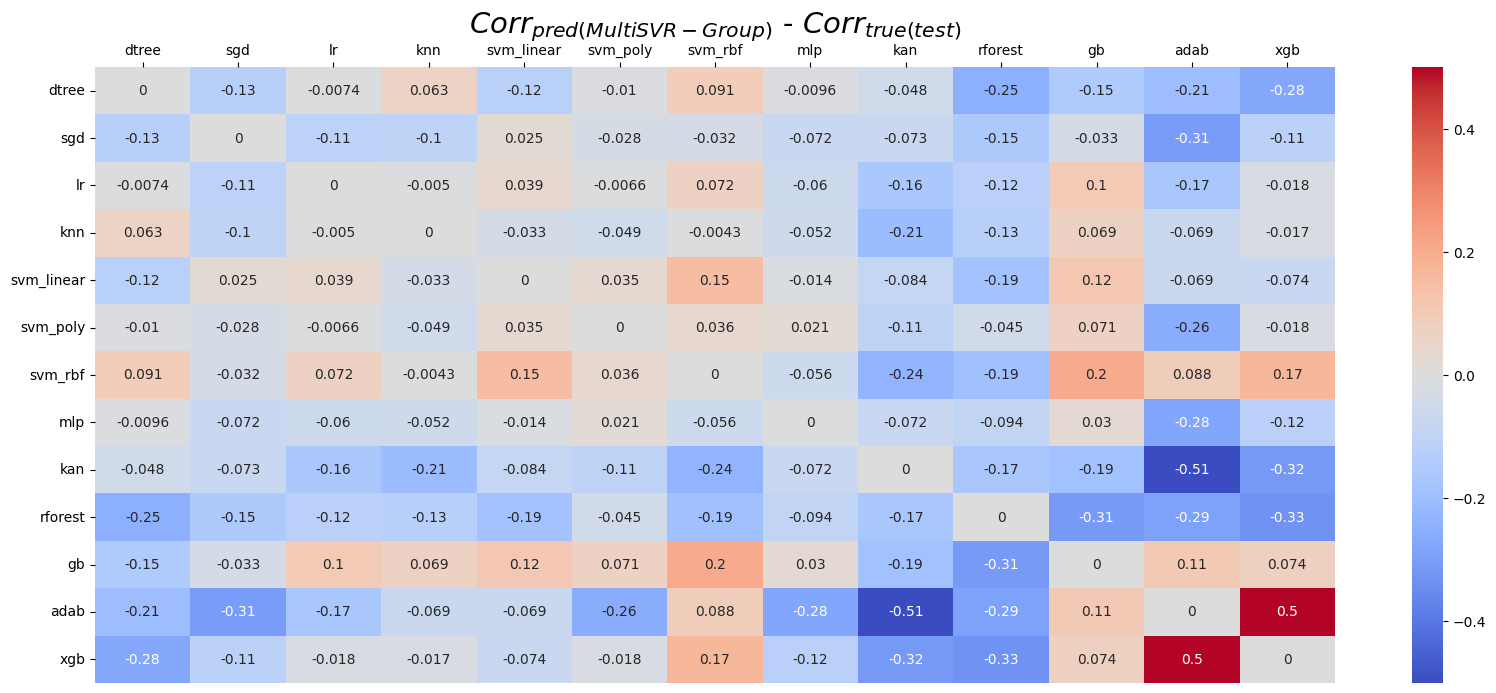

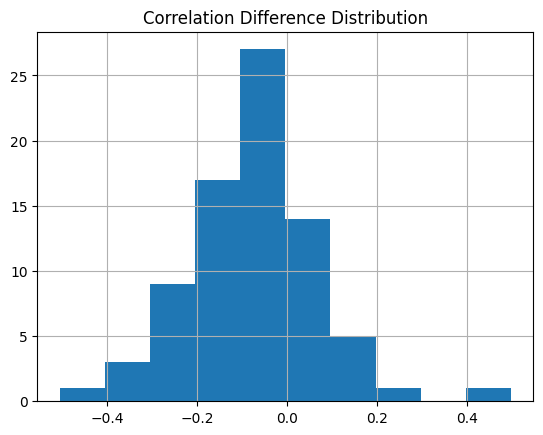

[['xgb', 'adab'], ['rforest'], ['sgd', 'svm_linear'], ['sgd', 'mlp'], ['kan'], ['dtree'], ['gb', 'svm_rbf'], ['knn', 'svm_rbf', 'lr'], ['lr', 'mlp', 'svm_poly'], ['svm_linear', 'lr']]


In [43]:
metrics_df.loc['M-SVR(g)',:] = assr_performance(msvrg, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

results = correlation_pred_performance(msvrg, pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test, min_score=MIN_SCORE, name="MultiSVR-Group")

diff_metrics.loc['M-SVR(g)',:] = results['results']

groups['msvrg_assessor'] = results['groups']
print(groups['msvrg_assessor']['test'])

### Multi-Target Random Forest Regressor

In [44]:
mrfg = GroupedAssessor(RandomForestRegressor, model_names, seed)

mrfg.fit(Xa_train, ya_train, groups['true_assessor_train'], random_state=seed)

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

[TRAINING SET]
MSE: 0.0061
NMSE: 0.1151
MAE: 0.0542
NMAE: 0.3147
aRRMSE: 0.3391
aCC: 0.9734

[TESTING SET]
MSE: 0.0557
NMSE: 1.0462
MAE: 0.1659
NMAE: 0.9410
aRRMSE: 1.0215
aCC: 0.1877


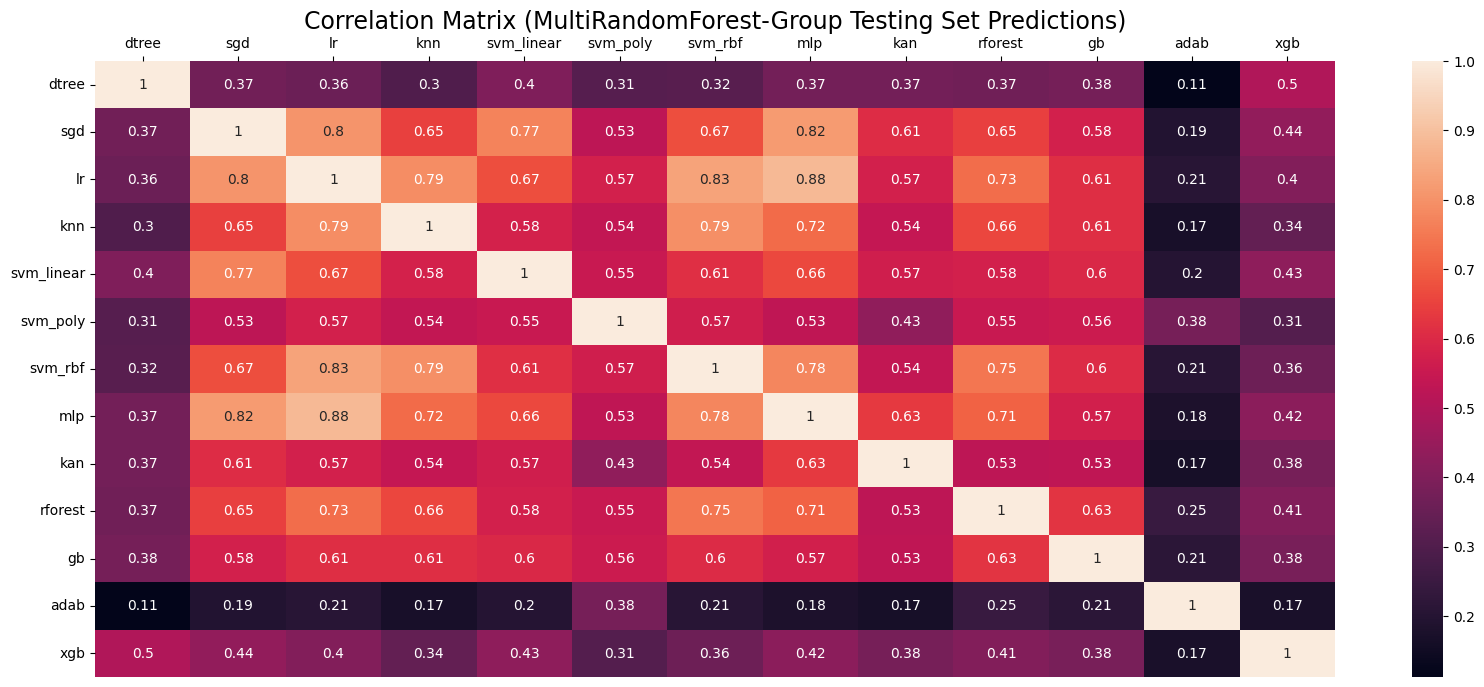

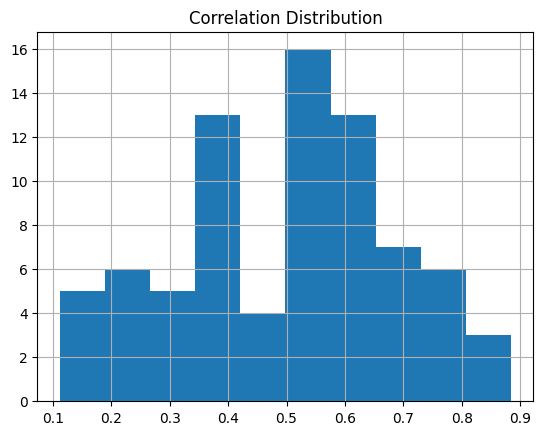

Testing correlation distribution:
count    78.000000
mean      0.500335
std       0.189302
min       0.112346
25%       0.372068
50%       0.538046
75%       0.622531
max       0.883951
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0213
NMSE: 0.0999
MAE: 0.8669
NMAE: 0.8953
aRRMSE: 0.8558
aCC: 0.8111


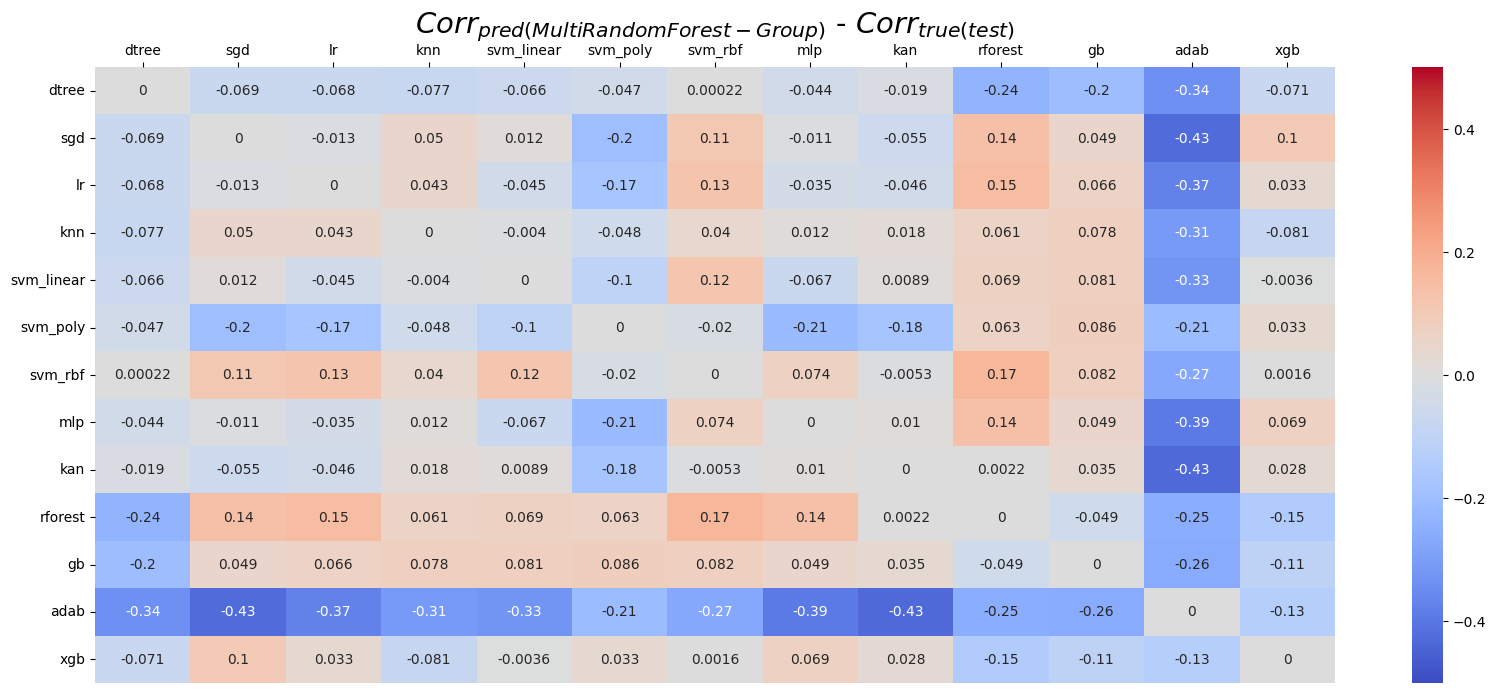

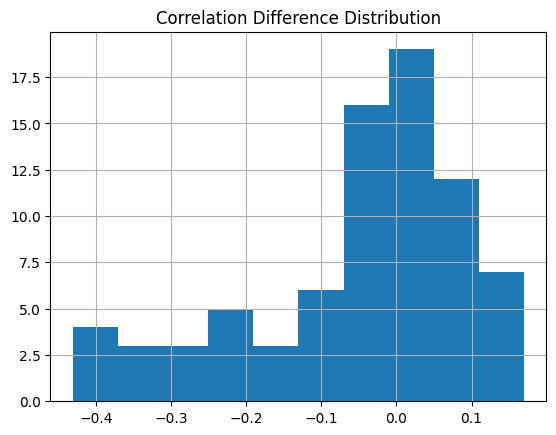

[['adab'], ['kan'], ['sgd', 'svm_linear'], ['dtree'], ['svm_poly'], ['gb'], ['xgb'], ['sgd', 'mlp', 'lr'], ['knn', 'svm_rbf', 'lr'], ['svm_rbf', 'mlp', 'lr'], ['svm_rbf', 'rforest', 'lr']]


In [45]:
metrics_df.loc['MRT(g)',:] = assr_performance(mrfg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(mrfg, Xa_test, ya_test, min_score=MIN_SCORE, name="MultiRandomForest-Group")

diff_metrics.loc['MRT(g)',:] = results['results']

groups['mrfg_assessor'] = results['groups']
print(groups['mrfg_assessor']['test'])

In [46]:
#keys = list(groups.keys())
#OBJV = len(groups['true_assessor_test'])
#for i in range(len(keys)):
#    if('test' in keys[i] and keys[i] != 'true_assessor_test'):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & true_assessor_test({OBJV}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups['true_assessor_test']):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

## Análises

In [47]:
results_df = metrics_df.copy()
results_df = results_df.reset_index()

results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0        ST       dtree  0.104349  0.951737  0.224283  0.800256   0.97557   
1        ST         sgd  0.094476  1.254439  0.244691   1.07953  1.120017   
2        ST          lr  0.046417   1.11667  0.171636  1.022398  1.056726   
3        ST         knn  0.049038   0.96854  0.174982  0.915773  0.984144   
4        ST  svm_linear  0.043766  1.086575  0.163649  1.007816  1.042389   
..      ...         ...       ...       ...       ...       ...       ...   
86    RC(g)         kan  0.165216  1.121646  0.315833  0.951298  1.059078   
87    RC(g)     rforest  0.047254  0.864178  0.167651  0.856544  0.929612   
88    RC(g)          gb  0.021777  0.986115   0.11291  0.947642  0.993033   
89    RC(g)        adab  0.004464  1.085798  0.047467  0.916775  1.042016   
90    RC(g)         xgb  0.003189  1.033272  0.040942   0.85781    1.0165   

         aCC  
0   0.279237  
1   0.014541  
2   0.119061  
3    0.24813  
4   0.138563  
..       ...  
86  0.123893  
87  0.374331  
88  0.216084  
89   0.13221  
90   0.19298  

[91 rows x 8 columns]

In [48]:
diff_results = diff_metrics.reset_index(names=['Assessor'])
diff_results.to_csv(f'data/{DIR}/results_diff.csv')
diff_results

Assessor       MSE       MAE      NMSE      NMAE    aRRMSE       aCC
0        ST   0.02238  0.108213  0.894734  0.947869  0.881068  0.815453
1       MRT  0.038984  0.164065  1.565188  1.441396  1.209004  0.775307
2    MRT(g)  0.021298  0.099878  0.866868  0.895314  0.855751  0.811144
3     M-SVR  0.019476   0.10004  0.796705  0.904293  0.831468  0.763911
4  M-SVR(g)  0.023848  0.111364  1.002705  1.025632  0.910339  0.786532
5        RC  0.014554  0.091332  0.542439  0.778509  0.715497  0.827071
6     RC(g)  0.021466   0.10035  0.871256   0.88699  0.852671  0.820086

In [49]:
win_table = pd.DataFrame(index=results_df['Assessor'].unique(), columns=results_df.drop(columns=['Assessor', 'Model']).columns)

for mt in ['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE']:
    assr_wins = results_df.loc[results_df.groupby("Model")[mt].idxmin(), ["Model", "Assessor", mt]]
    win_table[mt] = assr_wins['Assessor'].value_counts()

assr_wins = results_df.loc[results_df.groupby("Model")['aCC'].idxmin(), ["Model", "Assessor", 'aCC']]
win_table['aCC'] = assr_wins['Assessor'].value_counts()

win_table = win_table.fillna(0)
win_table.to_csv(f'data/{DIR}/win_table.csv')
win_table

MSE  MAE  NMSE  NMAE  aRRMSE  aCC
ST        1.0  1.0   2.0   2.0     1.0  0.0
MRT       2.0  2.0   0.0   0.0     2.0  2.0
MRT(g)    3.0  3.0   0.0   0.0     3.0  2.0
M-SVR     6.0  6.0   6.0   6.0     6.0  0.0
M-SVR(g)  1.0  1.0   1.0   1.0     1.0  2.0
RC        0.0  0.0   4.0   4.0     0.0  4.0
RC(g)     0.0  0.0   0.0   0.0     0.0  3.0

In [50]:
class_palette = sns.color_palette()[:7]

In [51]:
summary = results_df.drop(columns=['Model']).groupby(['Assessor']).agg(['mean', 'std'])
summary.to_csv(f'data/{DIR}/results.csv')
summary

MSE                 MAE                NMSE            \
              mean       std      mean       std      mean       std   
Assessor                                                               
M-SVR     0.047908  0.037073  1.273586  1.018455  0.156514  0.060676   
M-SVR(g)  0.052969  0.043059  1.326241  0.944388  0.160809  0.061259   
MRT       0.055249  0.042693  1.044929  0.084294  0.168549  0.076941   
MRT(g)    0.055682  0.045190  1.046221  0.112698  0.165925  0.076988   
RC        0.057271  0.042139  1.110169  0.099150  0.162007  0.072367   
RC(g)     0.056519  0.045016  1.067589  0.138021   0.16691  0.076310   
ST        0.055641  0.045231  1.045029  0.112236  0.165605  0.076568   

              NMAE              aRRMSE                 aCC            
              mean       std      mean       std      mean       std  
Assessor                                                              
M-SVR     0.982638  0.314142  1.076708  0.351866  0.339742  0.153545  
M-SVR(g)  1.002877  0.291270   1.10778  0.327597  0.306271  0.149363  
MRT       0.959905  0.053993  1.021449  0.041250    0.1633  0.087352  
MRT(g)    0.941003  0.081121  1.021475  0.055163  0.187667  0.106453  
RC        0.927396  0.073179  1.052669  0.047199  0.170837  0.083328  
RC(g)     0.948759  0.091485  1.031274  0.066352   0.16804  0.126812  
ST        0.939809  0.078207  1.020906  0.054880   0.18988  0.101838

In [52]:
results_df_c = results_df.copy()

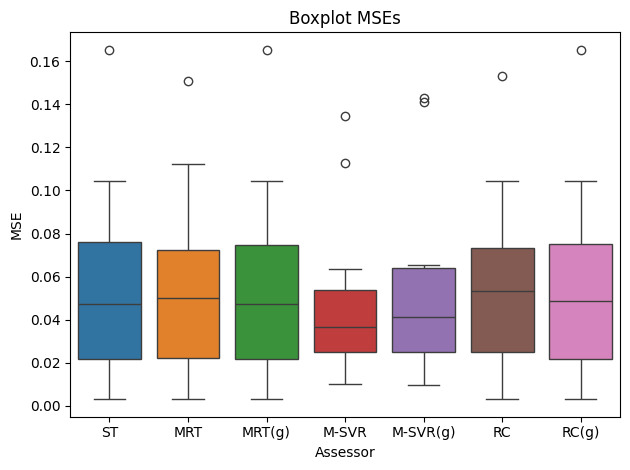

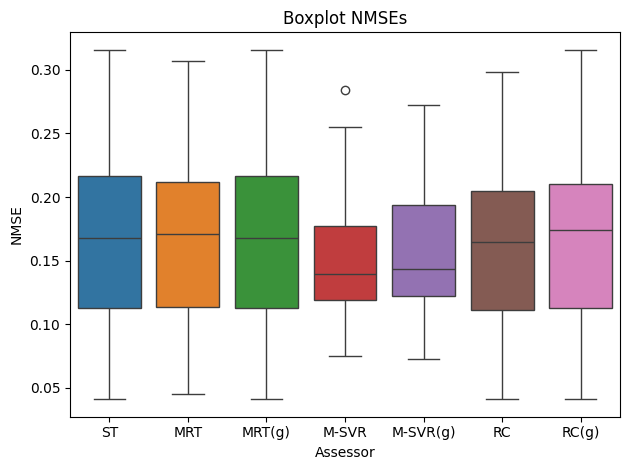

C:\Users\pedro\AppData\Local\Temp\ipykernel_9688\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


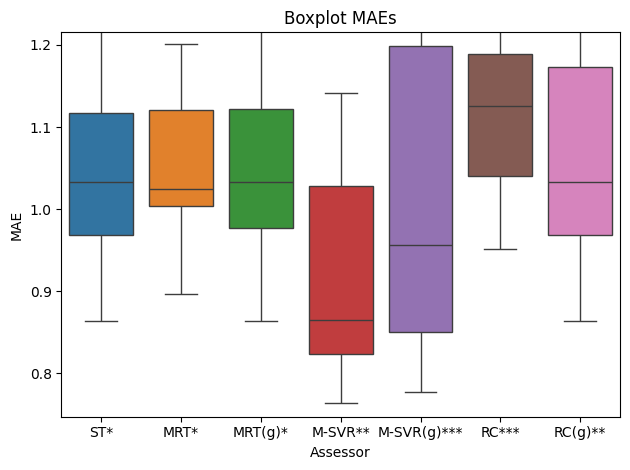

C:\Users\pedro\AppData\Local\Temp\ipykernel_9688\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


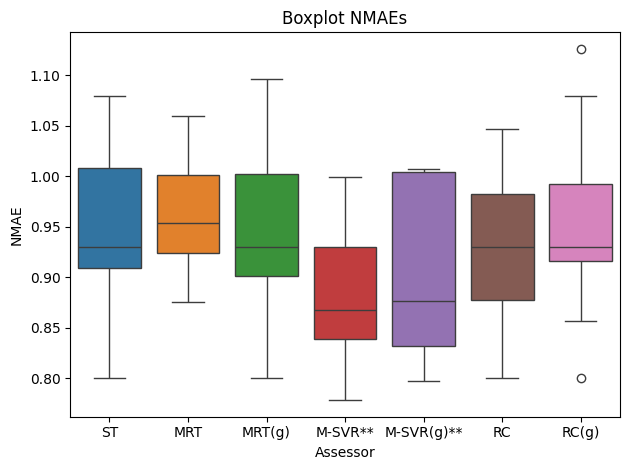

C:\Users\pedro\AppData\Local\Temp\ipykernel_9688\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


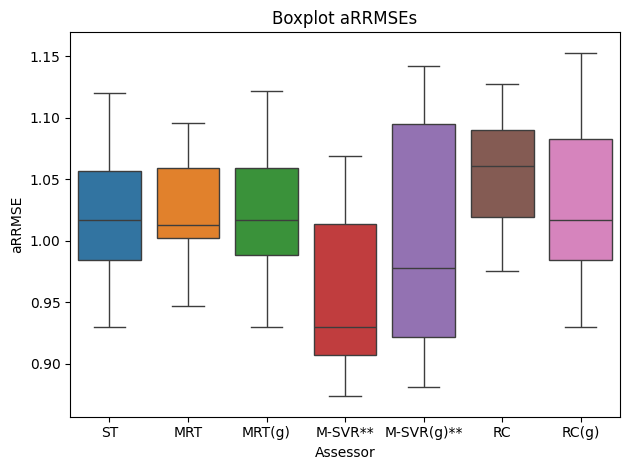

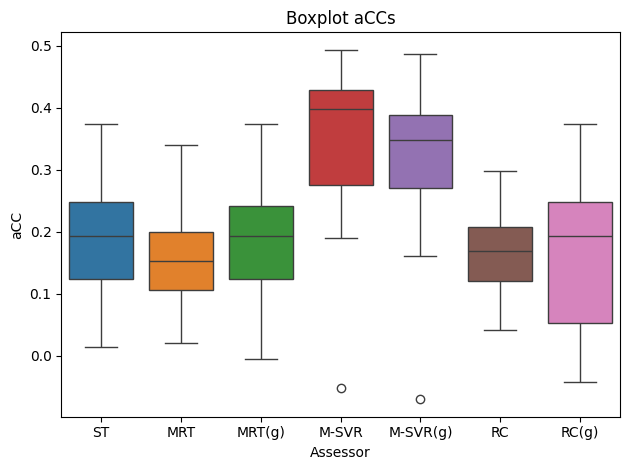

In [53]:
#temp = results_df.drop(index=results_df[results_df['Assessor'].str.contains('M-SVR')].index) #.copy()

for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.title(f'Boxplot {mt}s')
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.2).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.2).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.ylim(bottom=temp[mt].min()-0.017,top=temp.loc[temp[mt]<1.2,mt].max()+0.017)
    imgplt = sns.boxplot(temp, y=mt, x='Assessor', hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bp_{mt.lower()}.eps', format='eps', dpi=300)

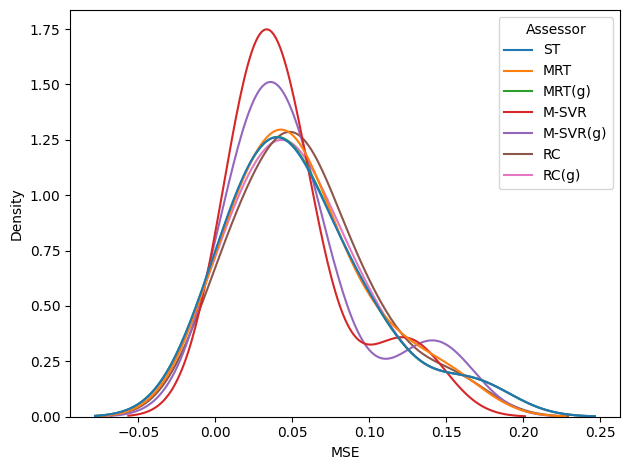

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


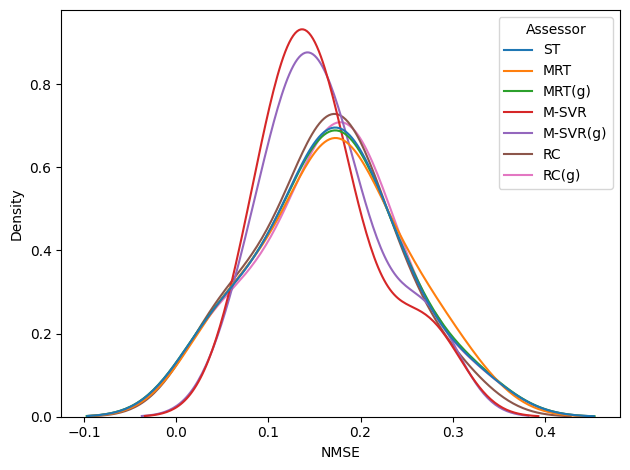

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_9688\1270300147.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


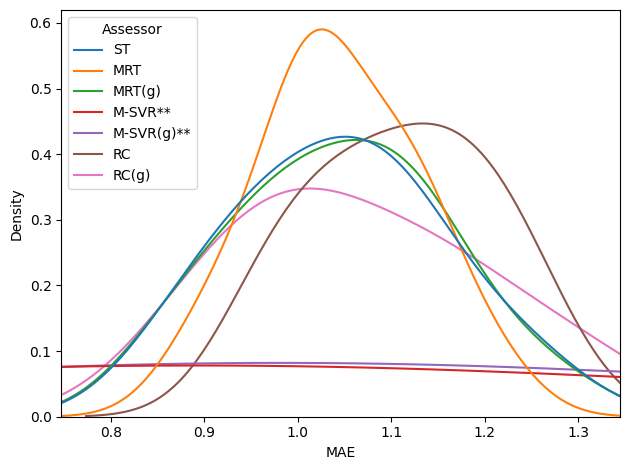

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_9688\1270300147.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


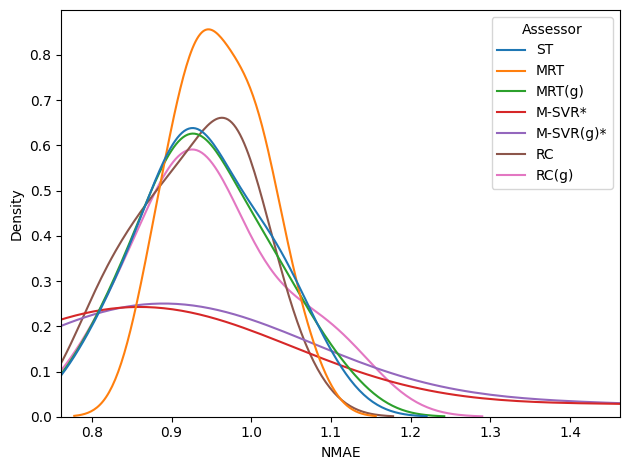

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_9688\1270300147.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


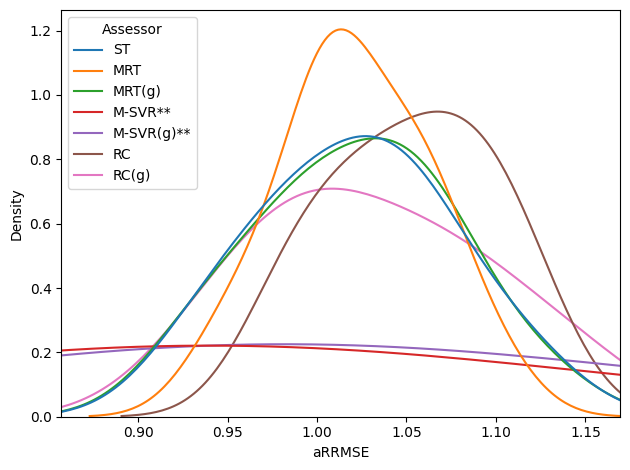

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


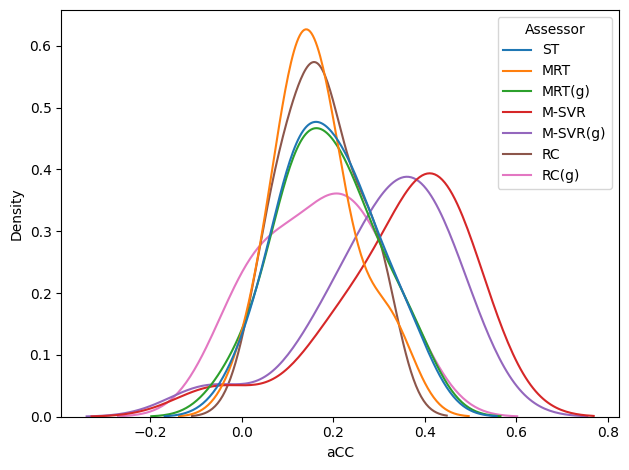

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [54]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.5).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.5).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.xlim(temp[mt].min()-0.017,temp.loc[temp[mt]<1.5,mt].max()+0.017)
    imgplt = sns.kdeplot(temp, x=mt, hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/kde_{mt.lower()}.eps', format='eps', dpi=300)

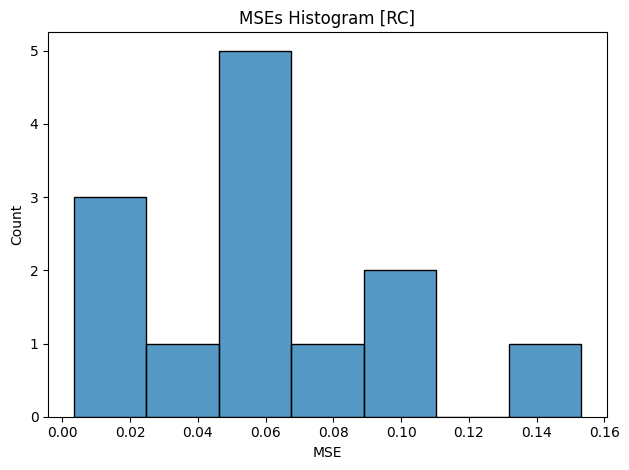

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


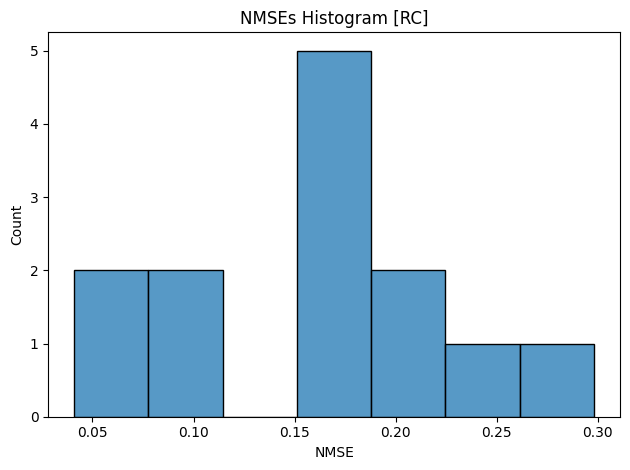

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


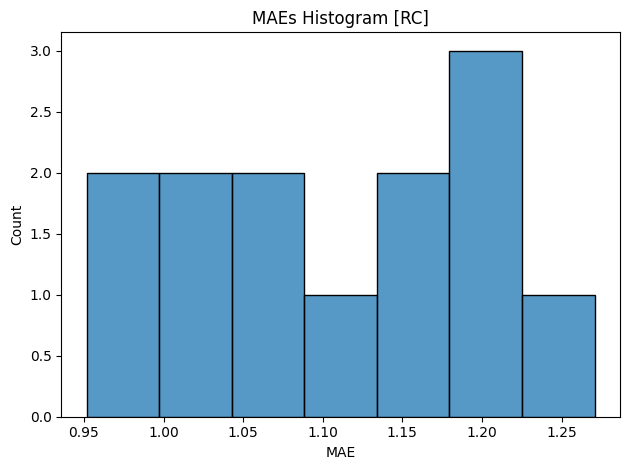

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


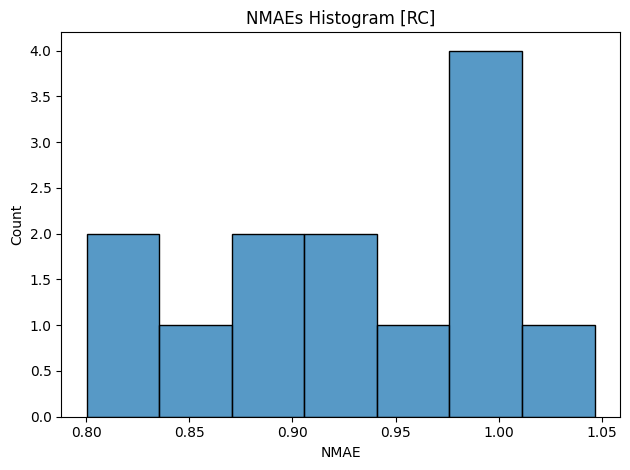

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


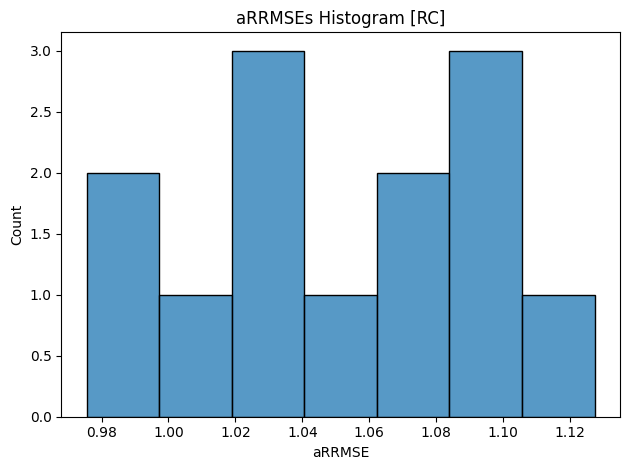

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


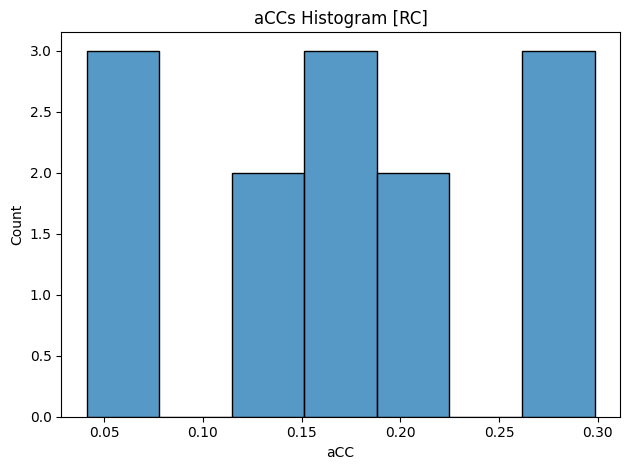

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


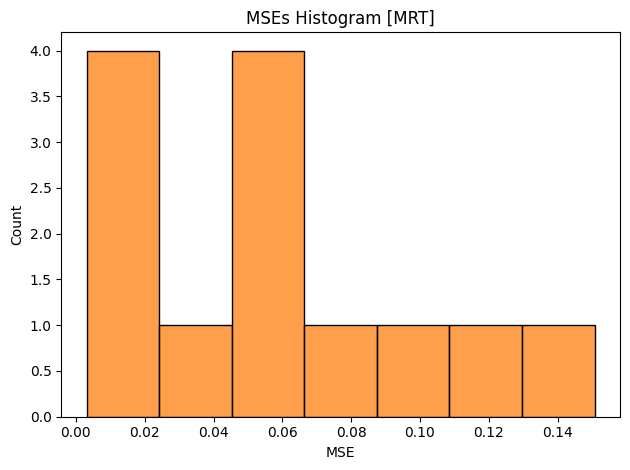

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


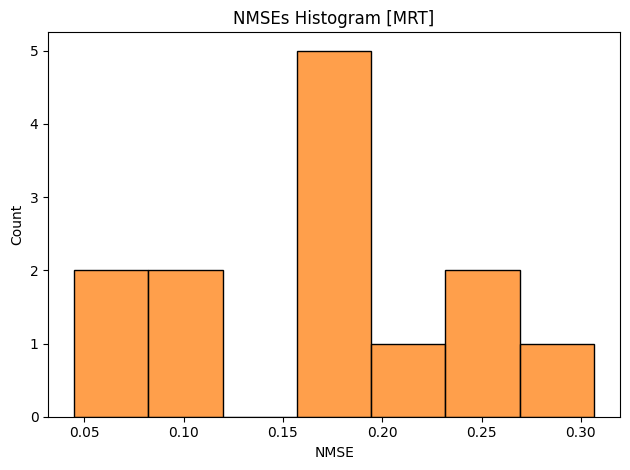

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


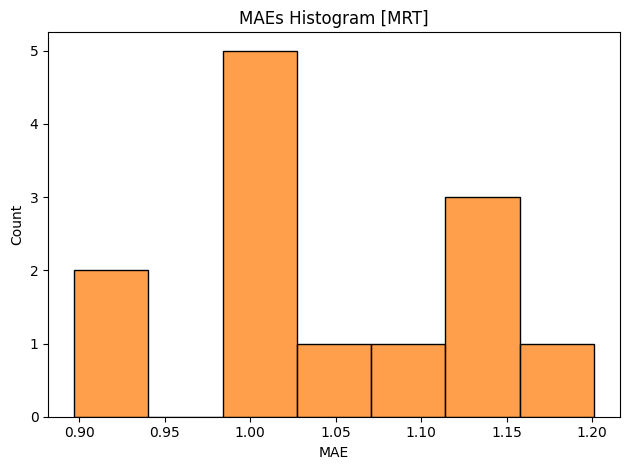

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


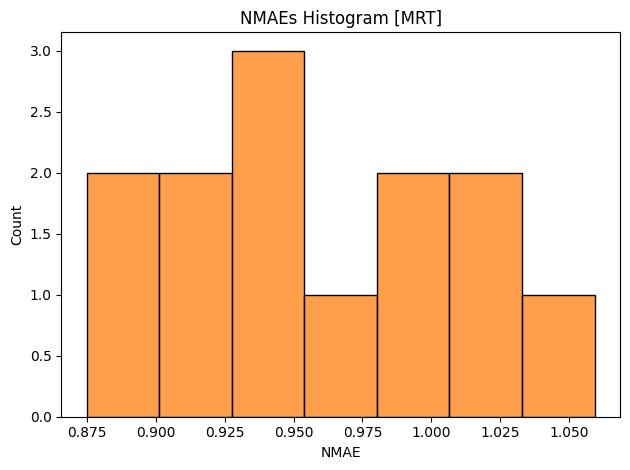

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


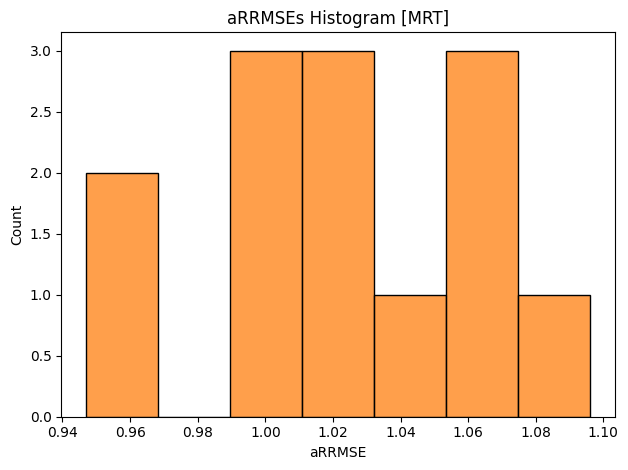

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


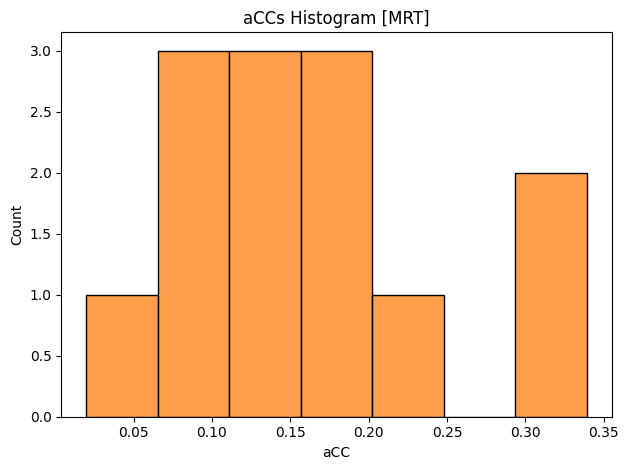

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


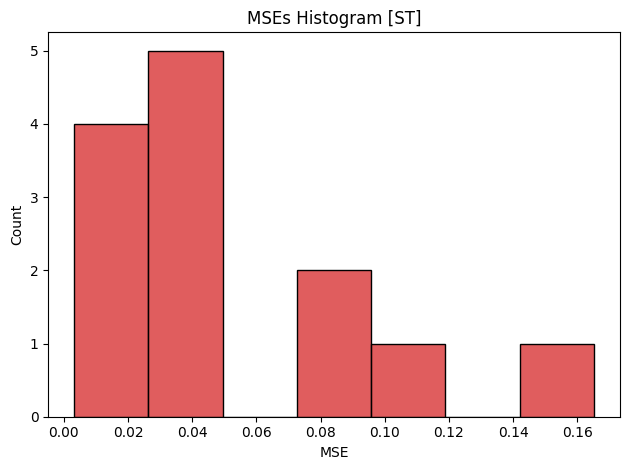

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


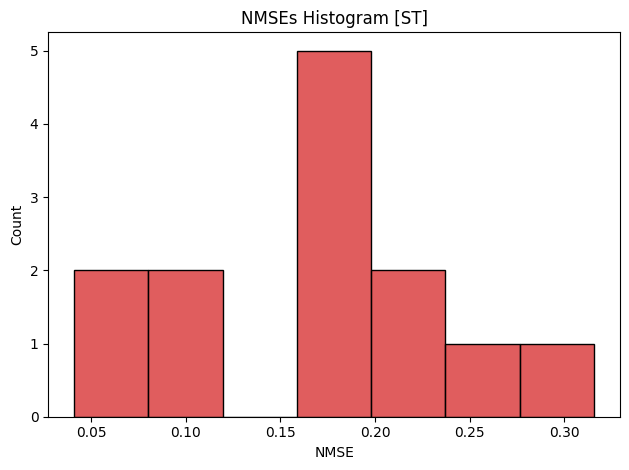

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


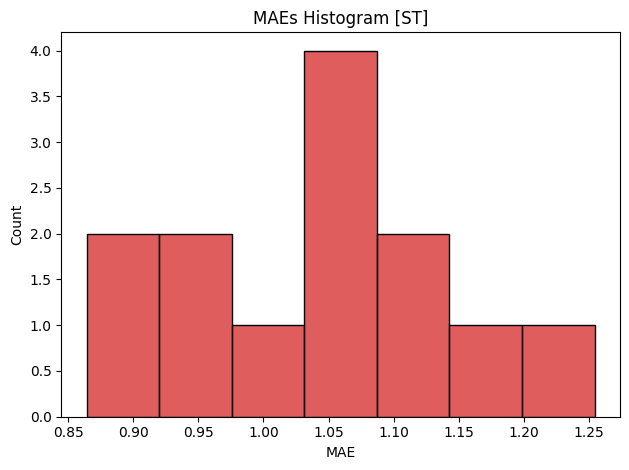

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


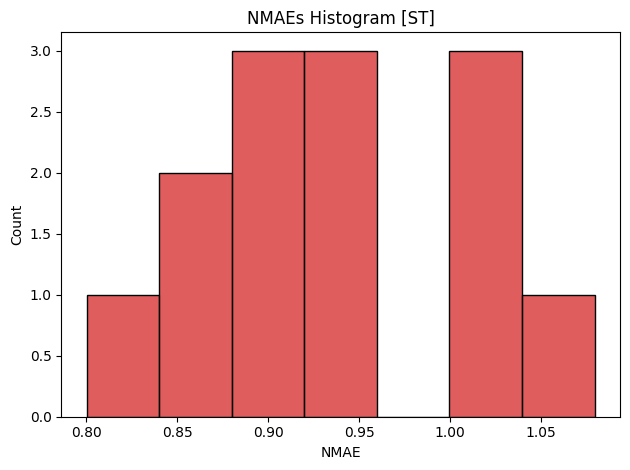

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


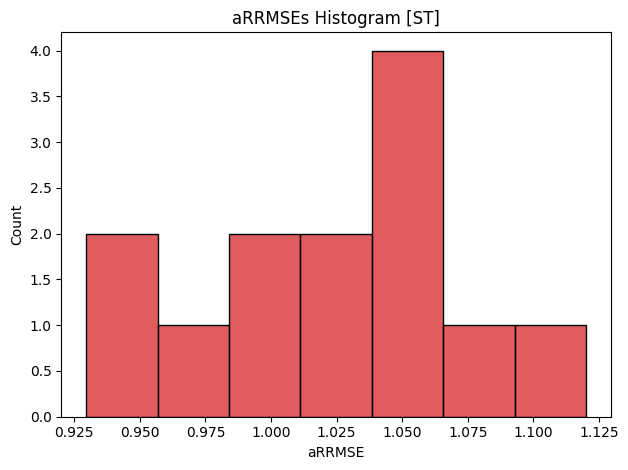

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


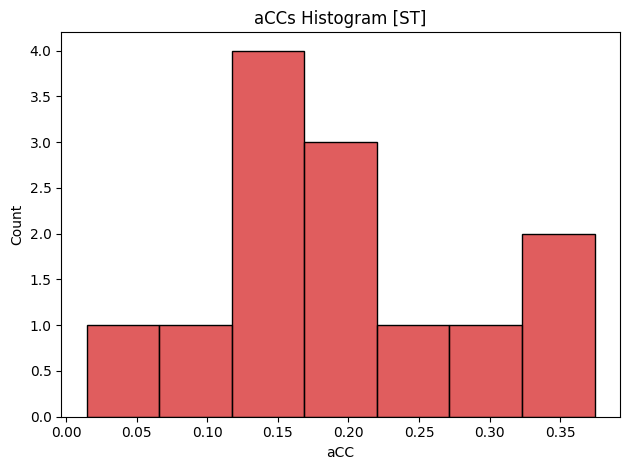

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


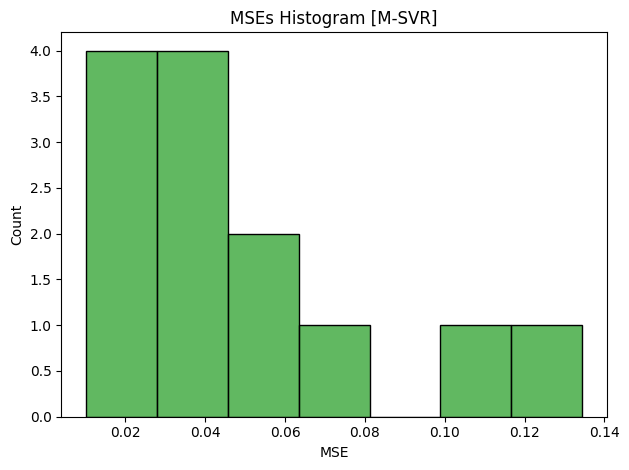

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


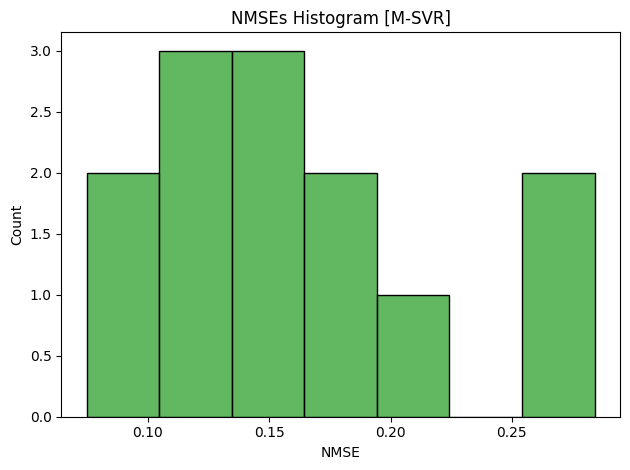

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


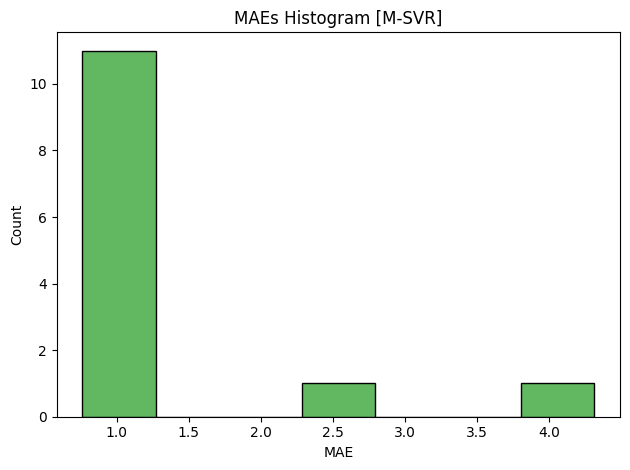

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


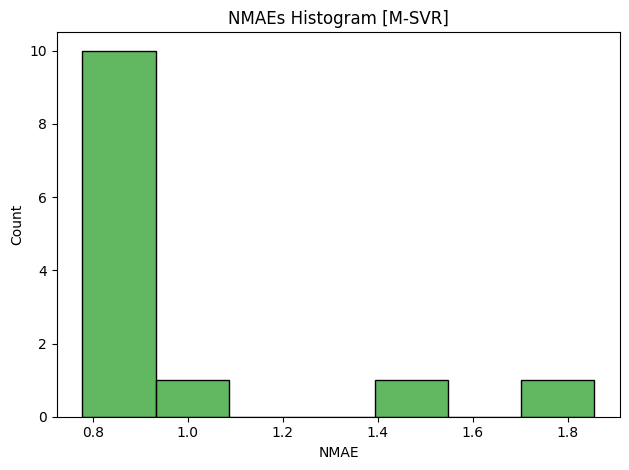

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


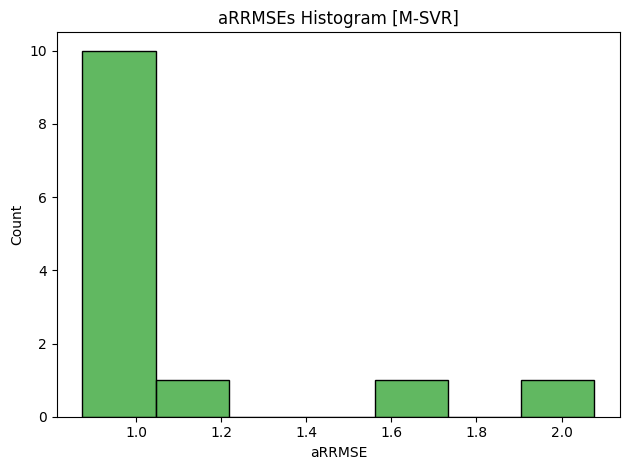

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


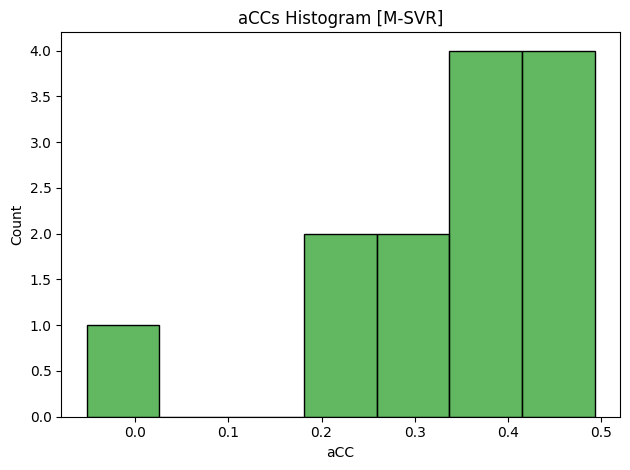

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


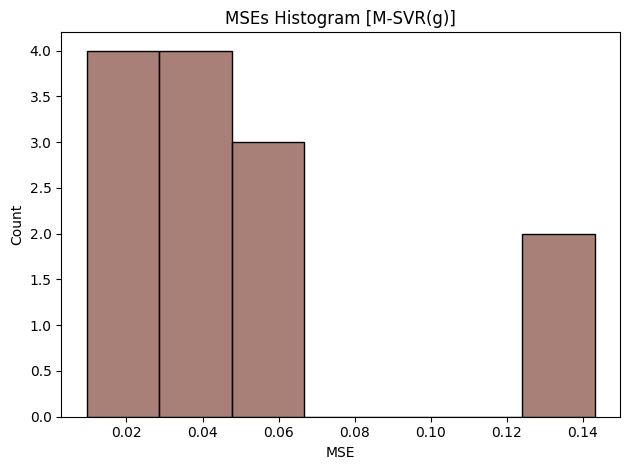

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


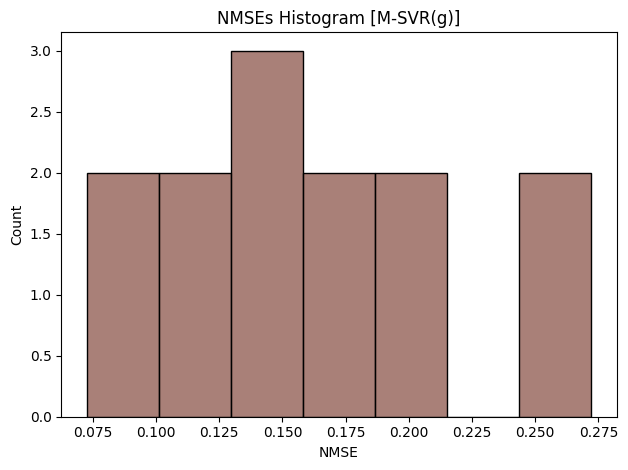

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


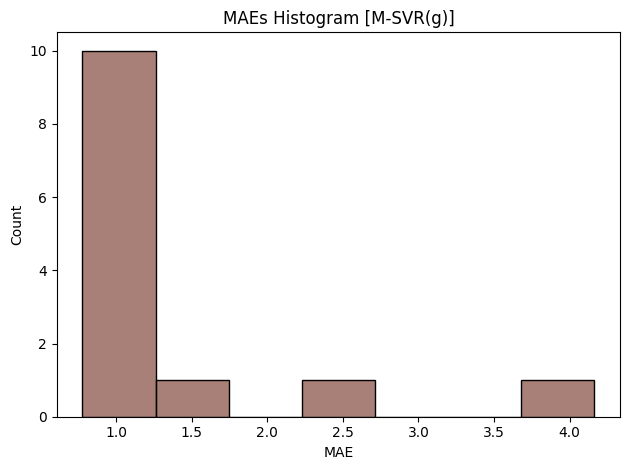

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


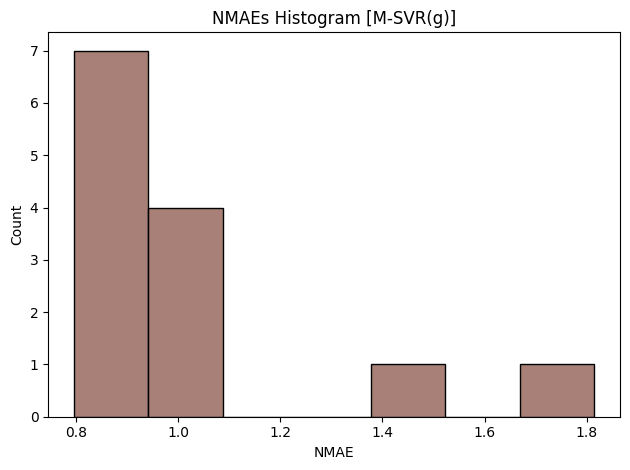

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


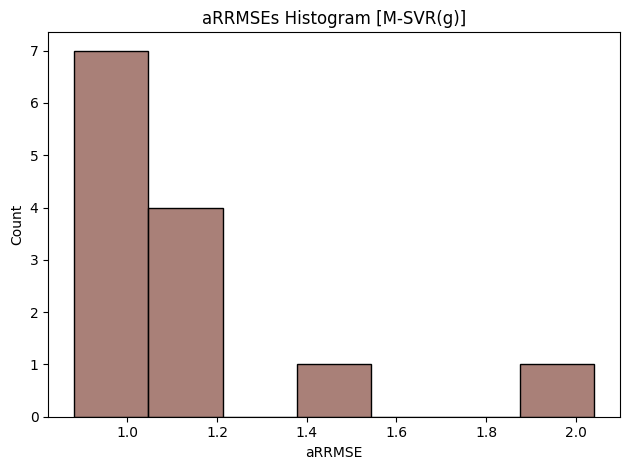

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


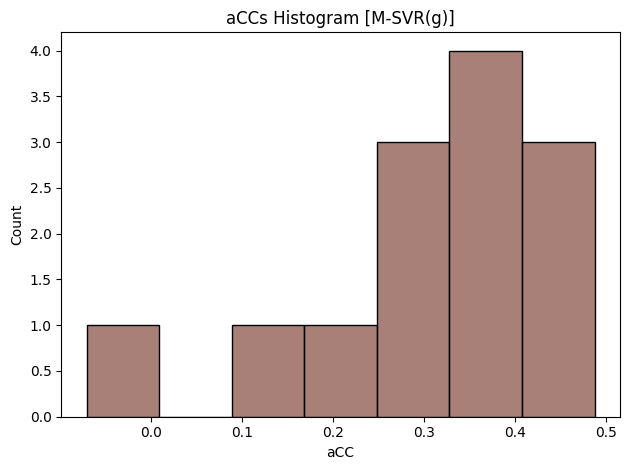

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


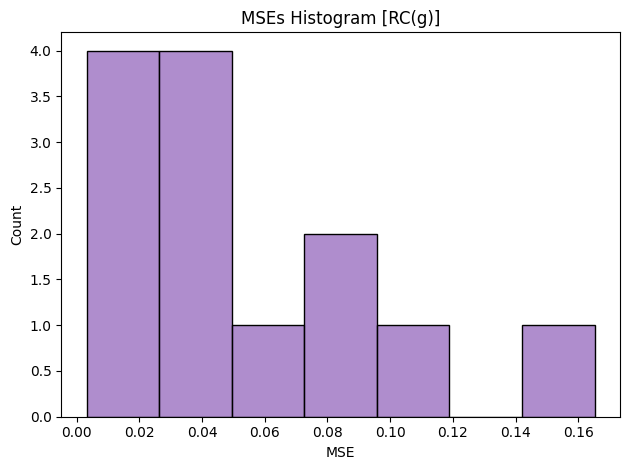

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


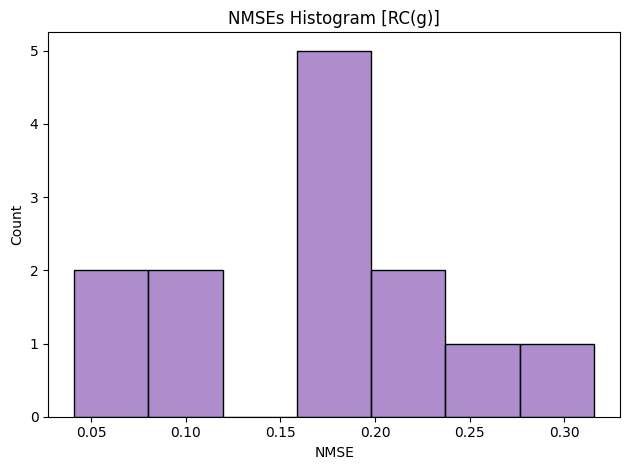

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


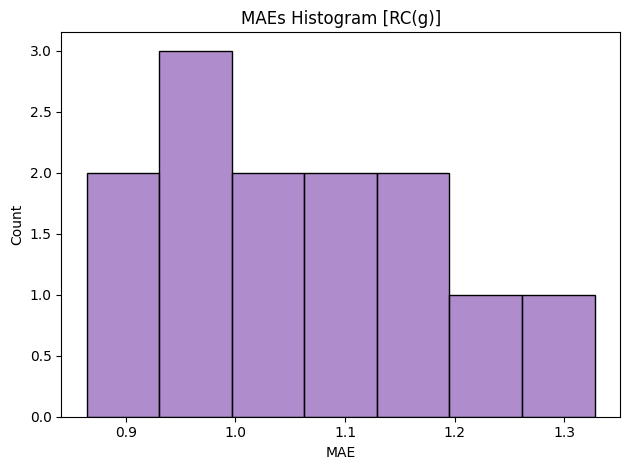

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


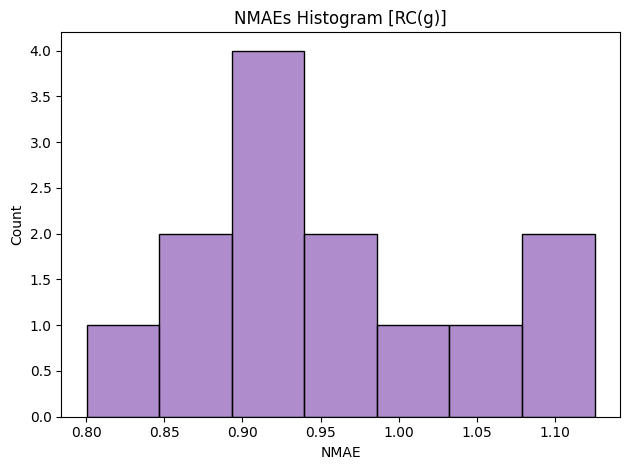

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


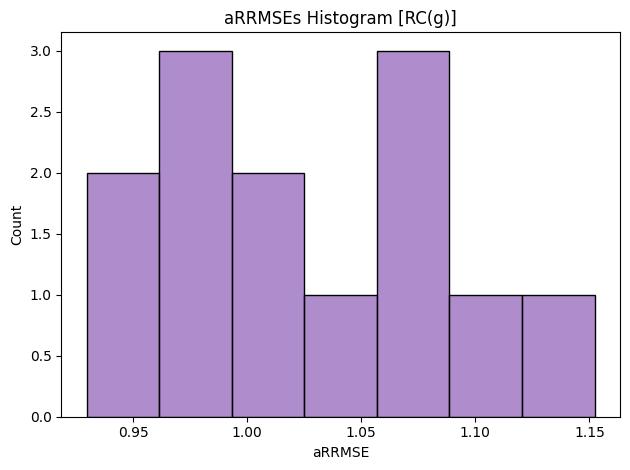

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


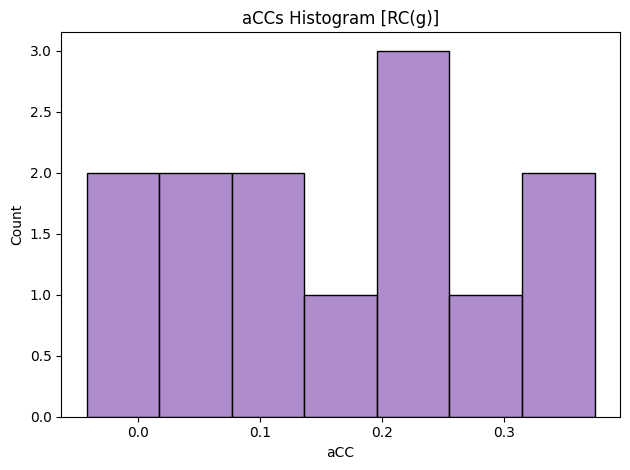

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


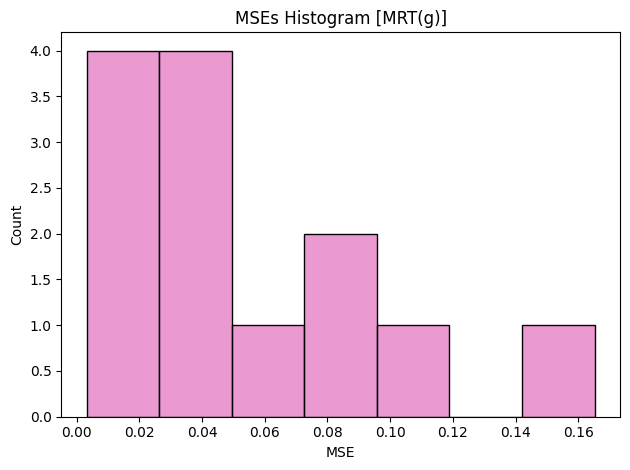

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


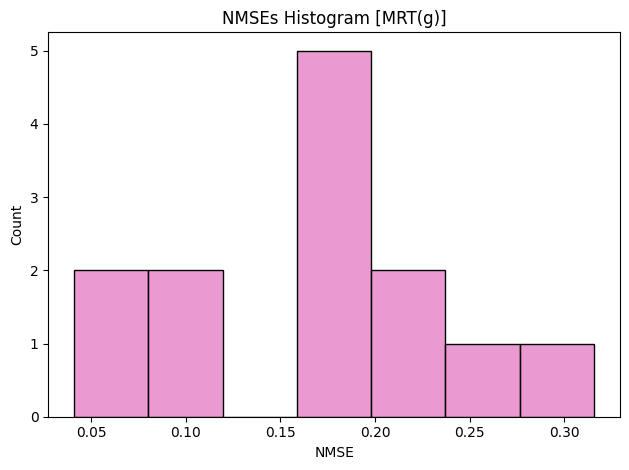

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


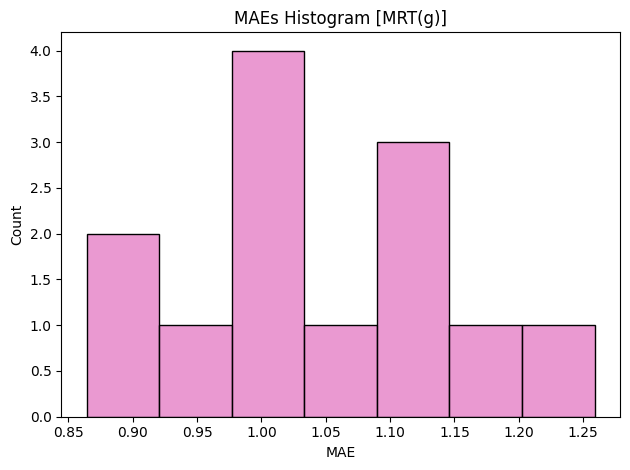

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


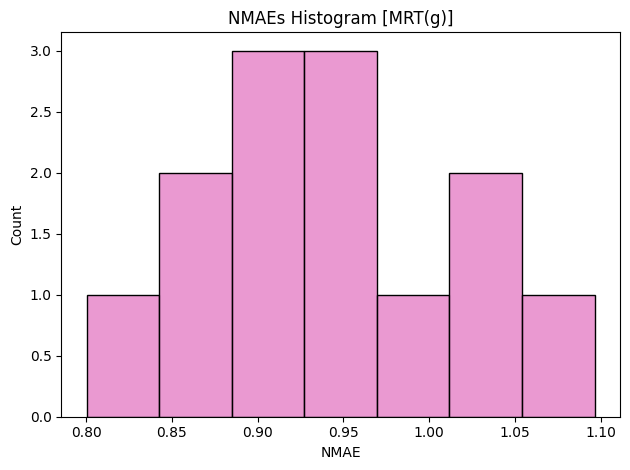

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


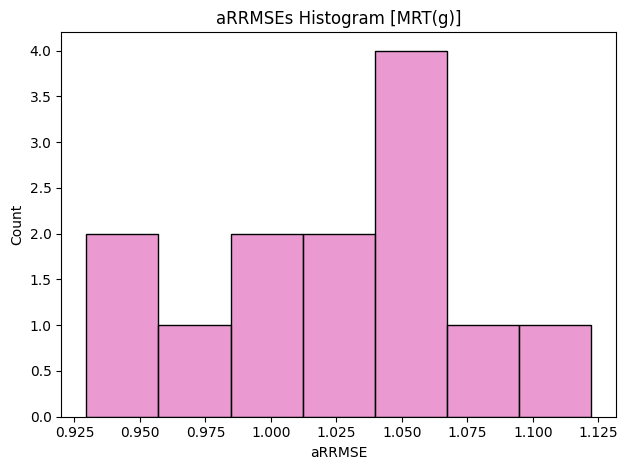

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


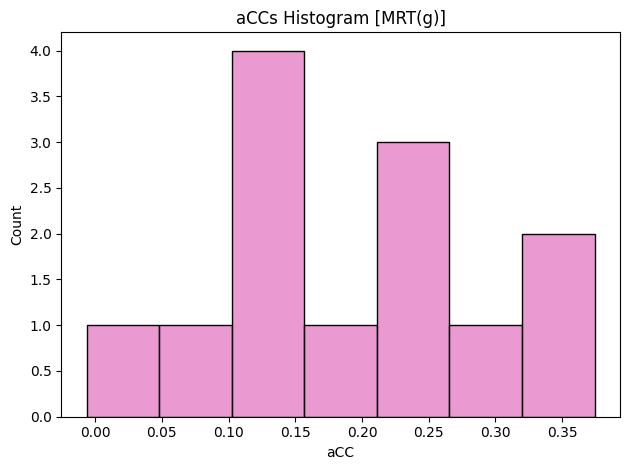

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [55]:
dicio = {'RC': {'color': class_palette[0], 'code': 'RC'},
         'MRT': {'color': class_palette[1], 'code': 'MRT'},
         'ST': {'color': class_palette[3], 'code': 'ST'},
         'M-SVR': {'color': class_palette[2], 'code': 'MSVR'},
         'M-SVR(g)': {'color': class_palette[-2], 'code': 'MSVRG'},
         'RC(g)': {'color': class_palette[-3], 'code': 'RCG'},
         'MRT(g)': {'color': class_palette[-1], 'code': 'MRTG'}}

for a in dicio.keys():
    for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
        plt.title(f'{mt}s Histogram [{a}]')
        imgplt = sns.histplot(results_df.loc[results_df['Assessor']==a,['Assessor','Model',mt]], x=mt, bins=7, color=dicio[a]['color'])
        plt.tight_layout()
        plt.show(imgplt)
        imgplt.figure.savefig(f'data/{DIR}/imgs/hg_{dicio[a]["code"]}_{mt.lower()}.eps', format='eps', dpi=300)

In [56]:
results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0        ST       dtree  0.104349  0.951737  0.224283  0.800256   0.97557   
1        ST         sgd  0.094476  1.254439  0.244691   1.07953  1.120017   
2        ST          lr  0.046417   1.11667  0.171636  1.022398  1.056726   
3        ST         knn  0.049038   0.96854  0.174982  0.915773  0.984144   
4        ST  svm_linear  0.043766  1.086575  0.163649  1.007816  1.042389   
..      ...         ...       ...       ...       ...       ...       ...   
86    RC(g)         kan  0.165216  1.121646  0.315833  0.951298  1.059078   
87    RC(g)     rforest  0.047254  0.864178  0.167651  0.856544  0.929612   
88    RC(g)          gb  0.021777  0.986115   0.11291  0.947642  0.993033   
89    RC(g)        adab  0.004464  1.085798  0.047467  0.916775  1.042016   
90    RC(g)         xgb  0.003189  1.033272  0.040942   0.85781    1.0165   

         aCC  
0   0.279237  
1   0.014541  
2   0.119061  
3    0.24813  
4   0.138563  
..       ...  
86  0.123893  
87  0.374331  
88  0.216084  
89   0.13221  
90   0.19298  

[91 rows x 8 columns]

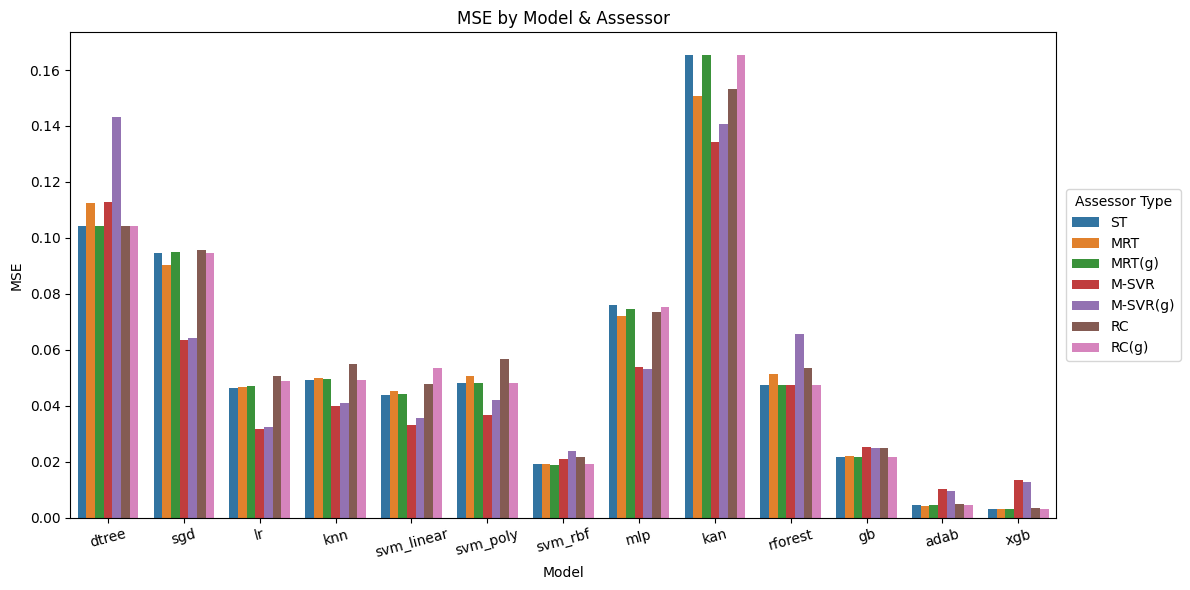

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


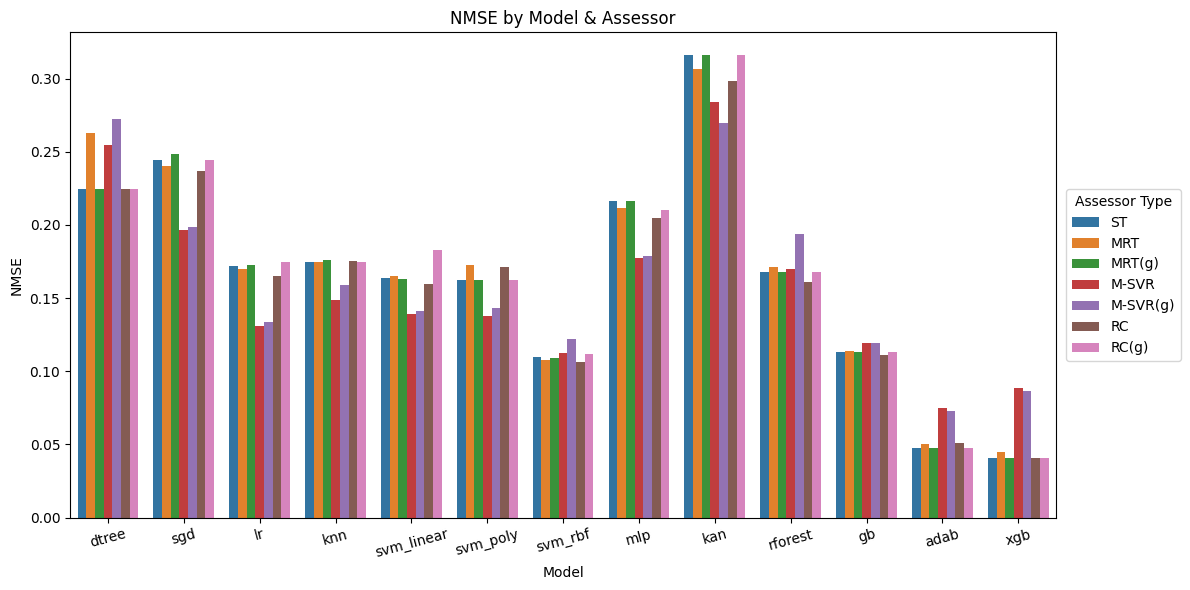

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


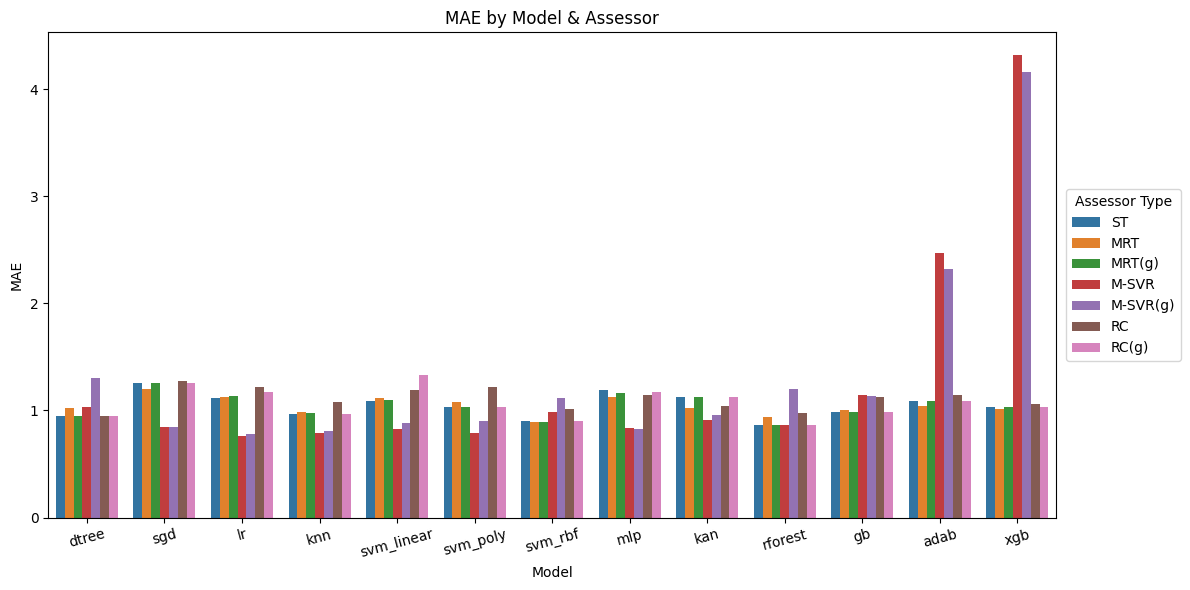

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


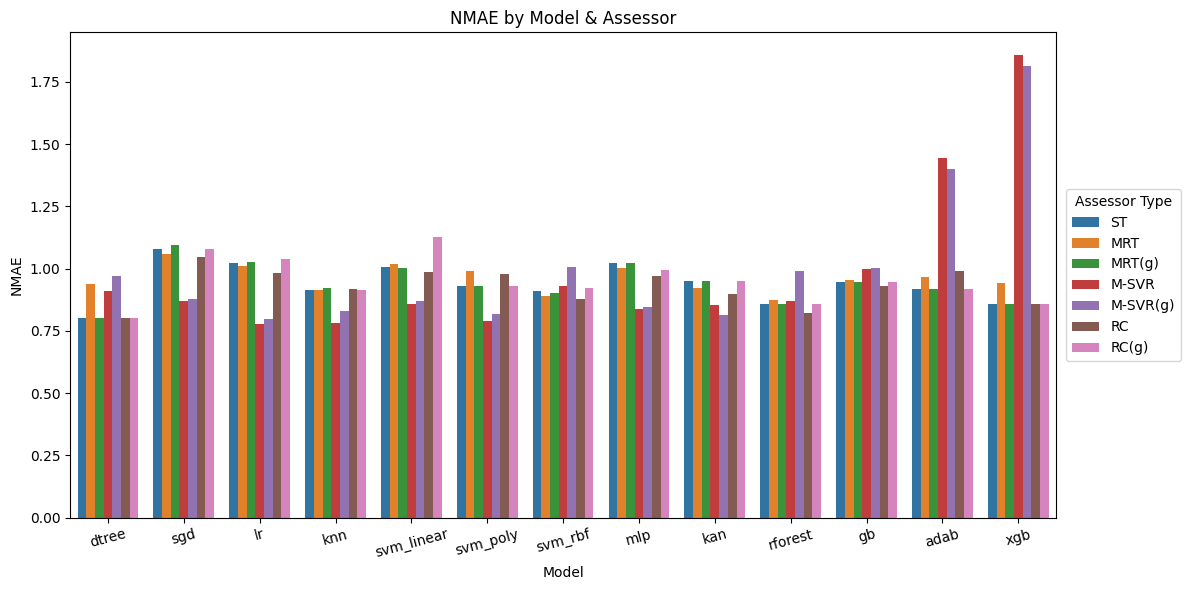

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


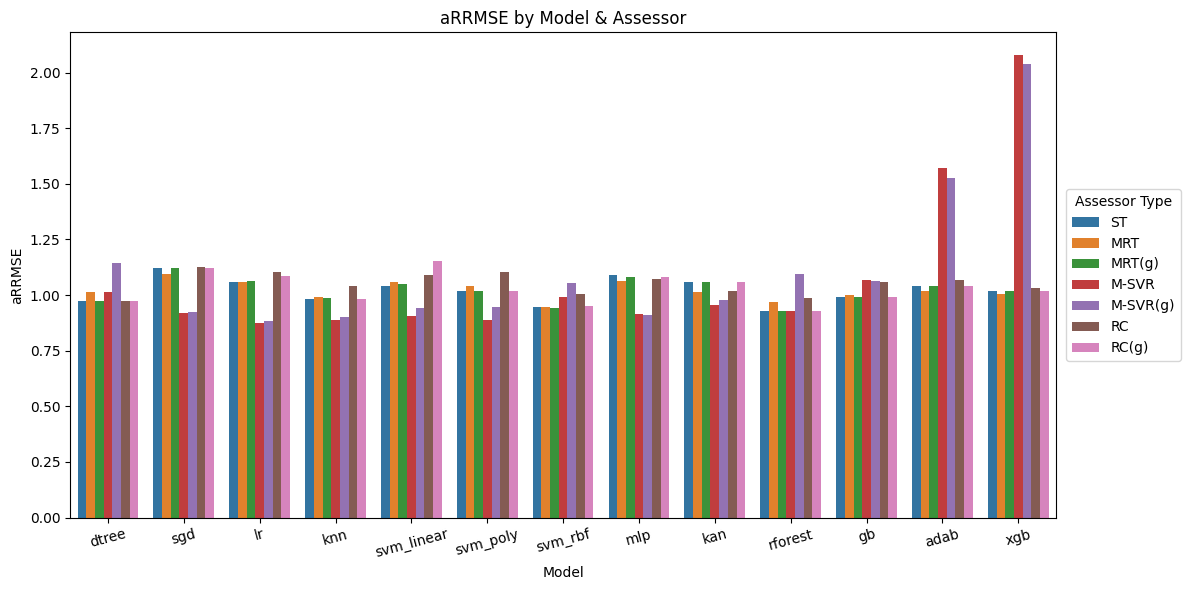

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


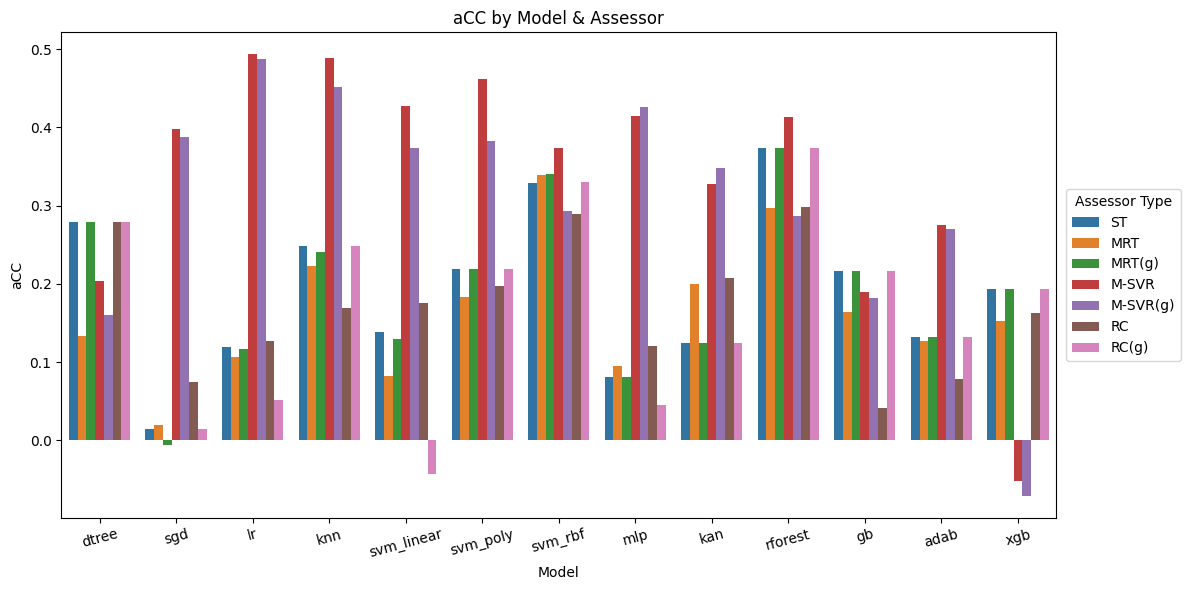

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [57]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=results_df, x='Model', y=mt, hue='Assessor', palette=class_palette)
    plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0, title='Assessor Type')
    plt.title(f'{mt} by Model & Assessor')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bar_{mt.lower()}.eps', format='eps', dpi=300)

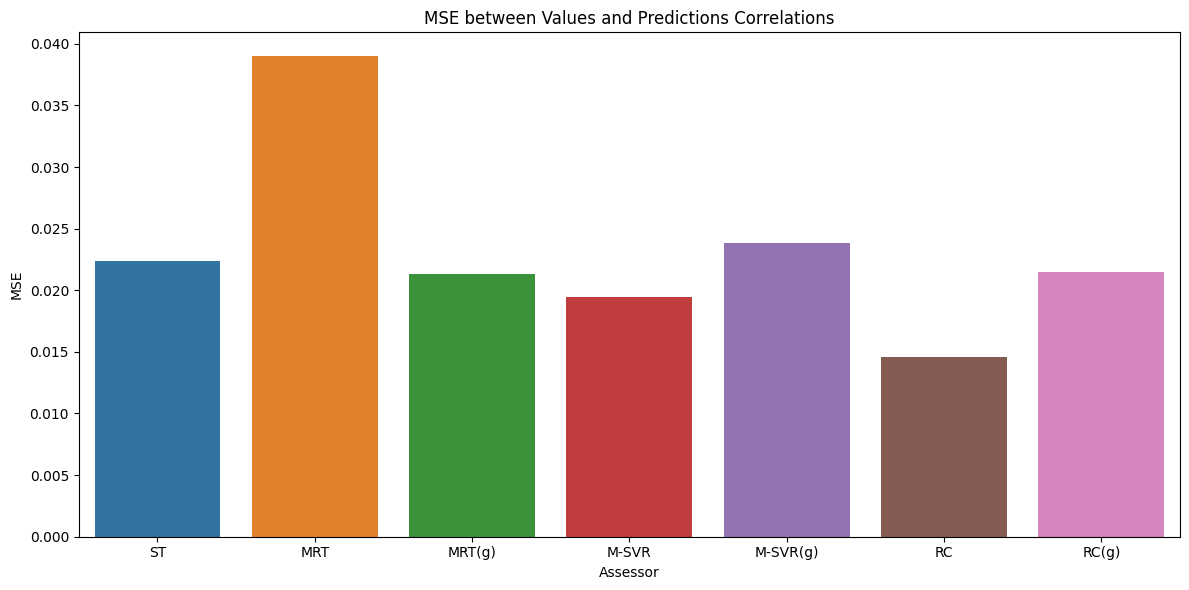

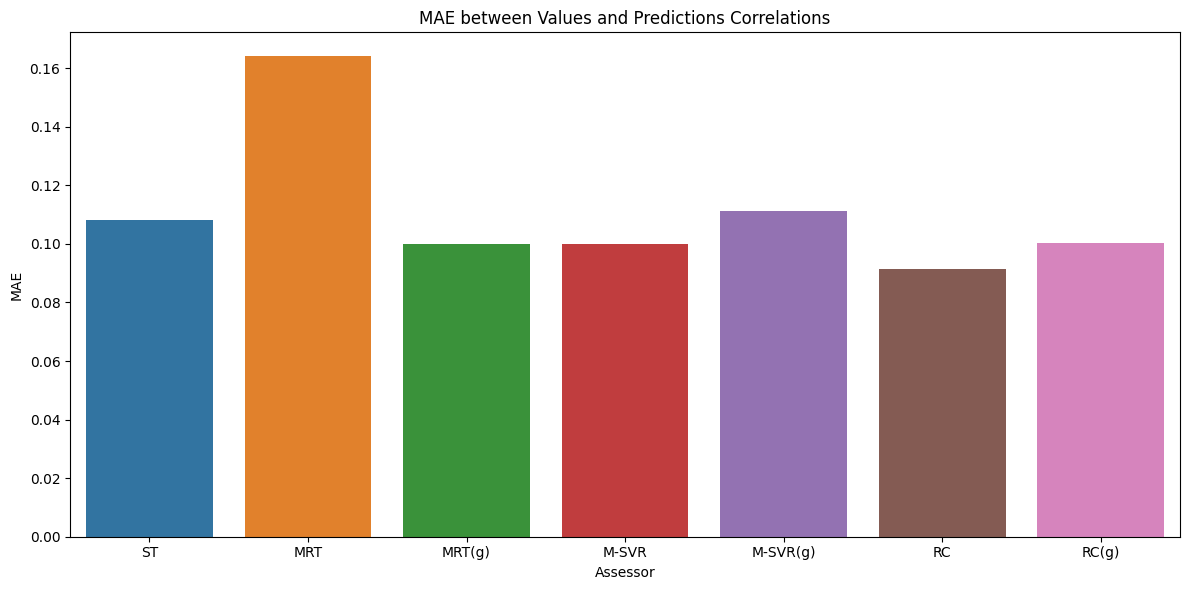

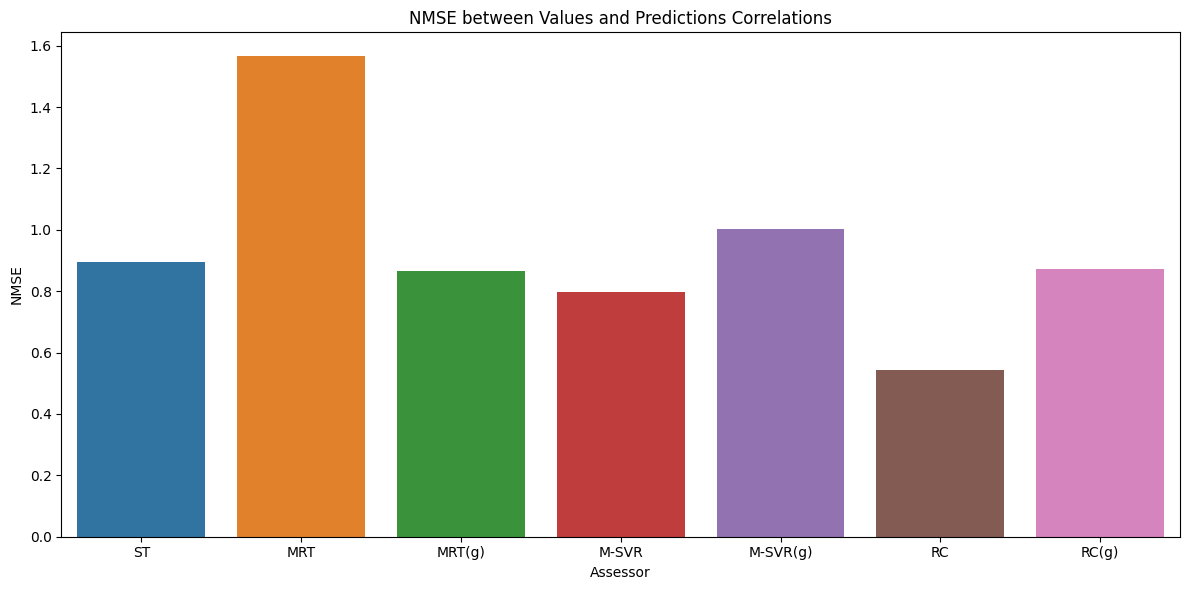

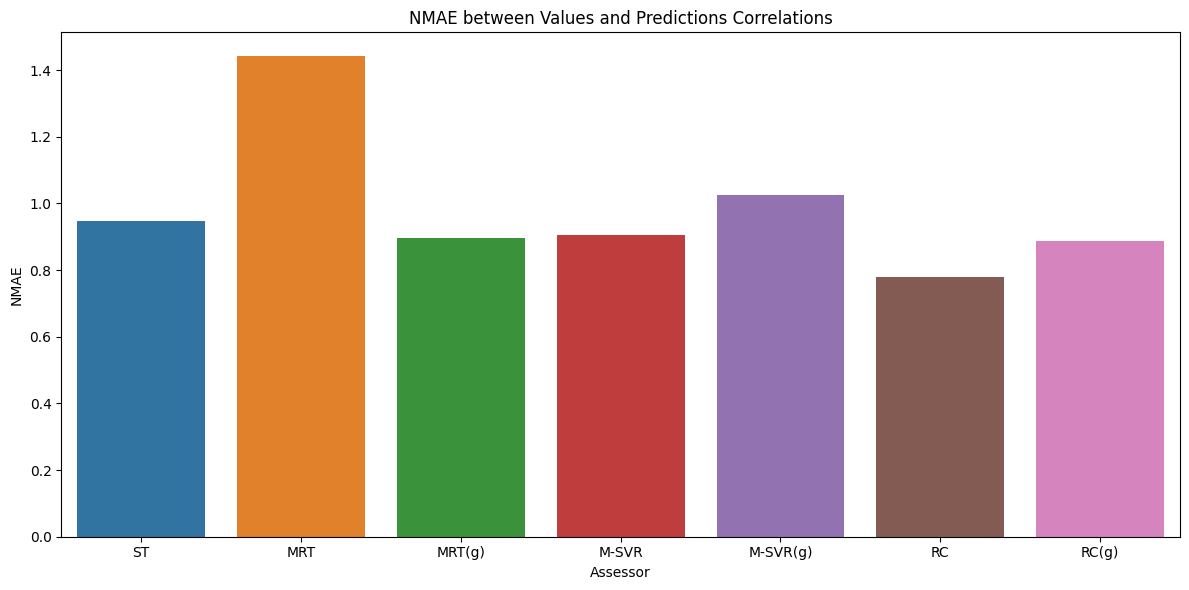

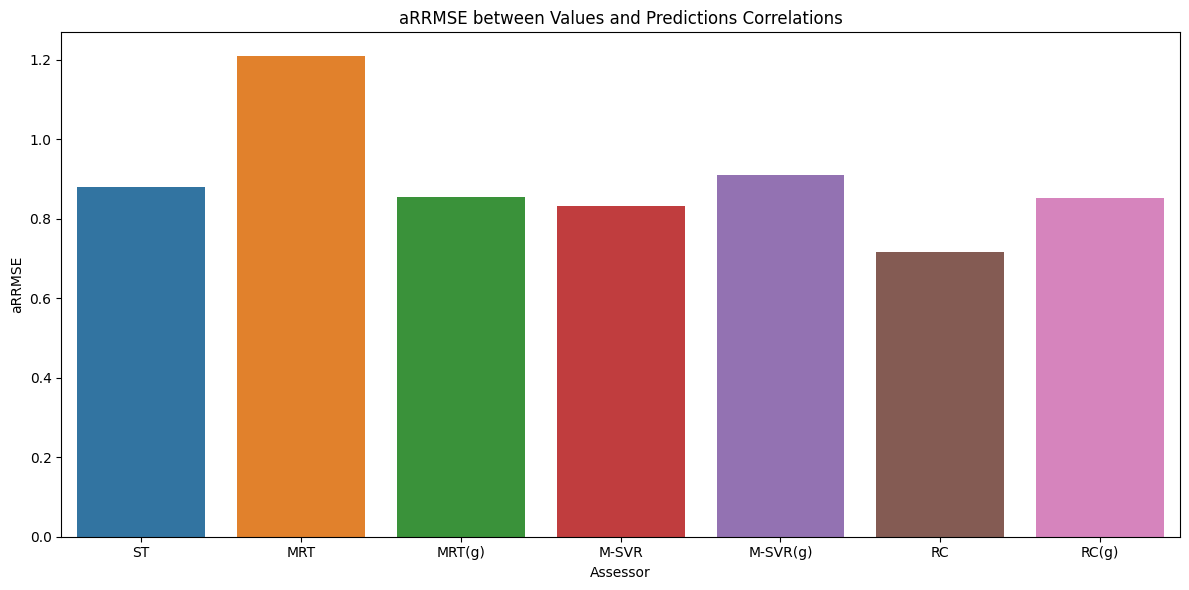

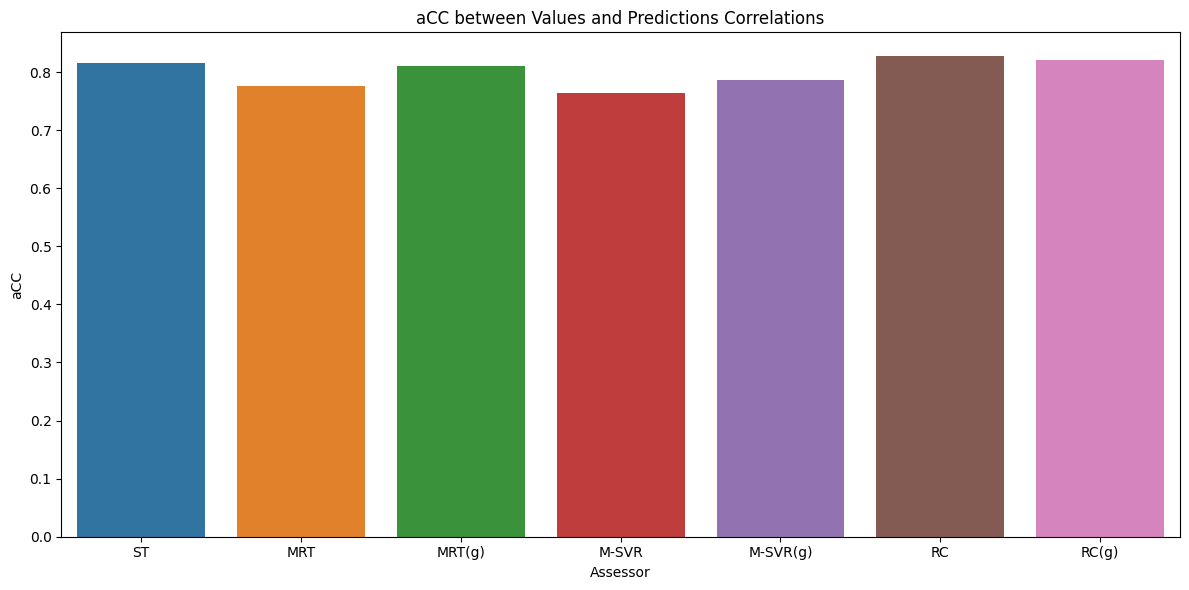

In [58]:
for mt in diff_metrics.columns:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=diff_results.loc[:,['Assessor', mt]], x='Assessor', y=mt, hue='Assessor', palette=class_palette)
    plt.title(f"{mt} between Values and Predictions Correlations")
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bardiff_{mt.lower()}.eps', format='eps', dpi=300)